### Import the dataset's with requirments libarires

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import plotly as py
import plotly.graph_objs as go
import os
py.offline.init_notebook_mode(connected = True)
import datetime as dt
import missingno as msno
plt.rcParams['figure.dpi'] = 140

In [2]:
netflix = pd.read_csv('netflix_titles.csv')
amazon = pd.read_csv('amazon_prime_titles.csv')
disney = pd.read_csv('disney_plus_titles.csv')

In [3]:
print(netflix.shape)

(8807, 12)


In [4]:
print(amazon.shape)

(9668, 12)


In [5]:
print(disney.shape)

(1450, 12)


In [6]:
netflix.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7621,s7622,Movie,Now More Than Ever: The History of Chicago,Peter Pardini,Chicago,United States,"January 1, 2018",2016,TV-MA,114 min,"Documentaries, Music & Musicals",This rockumentary tells the behind-the-scenes ...
6507,s6508,TV Show,Club Friday To Be Continued - Friend & Enemy,NaN,"Wanida Termthanaporn, Apinya Sakuljaroensuk, G...",NaN,"April 20, 2018",2016,TV-MA,1 Season,"International TV Shows, Romantic TV Shows, TV ...","A love triangle spirals out of control, wreaki..."
2349,s2350,TV Show,It's Okay to Not Be Okay,NaN,"Kim Soo-hyun, Seo Yea-ji, Oh Jung-se, Park Gyu...",South Korea,"June 21, 2020",2020,TV-MA,1 Season,"International TV Shows, Korean TV Shows, Roman...",An extraordinary road to emotional healing ope...
6405,s6406,Movie,Calico Critters: A Town of Dreams,Momoko Kamiya,NaN,NaN,"November 1, 2018",2017,TV-Y,11 min,Children & Family Movies,Freya heads into town with her mother for a ve...
1648,s1649,Movie,Ghosts of War,Eric Bress,"Brenton Thwaites, Theo Rossi, Skylar Astin, Ky...",United Kingdom,"November 25, 2020",2020,R,95 min,Horror Movies,"Five, battle-worn Allied soldiers guarding a c..."


In [7]:
amazon.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4778,s4779,TV Show,Journal of the Mysterious Creatures,NaN,"Jo Mikami, Suzaki Aya, Yuko Natsuyoshi, Nobuyu...",NaN,NaN,2019,13+,1 Season,Animation,"Yoshihito, an young man, decides to rent out a..."
2903,s2904,Movie,Cartoon Classics - Vol. 2: 25 Favorite Cartoon...,Max Fleischer,"Bugs Bunny, Daffy Duck, Elmer Fudd, Porky Pig,...",NaN,NaN,2017,13+,183 min,Animation,Enjoy 3 more hours of Classic Cartoons from th...
2264,s2265,TV Show,Hangar 1: The UFO Files,NaN,"Nik Petcov, Cornell Womack",NaN,NaN,2015,TV-PG,2 Seasons,"Science Fiction, Suspense, Unscripted",Go behind the restricted doors as Hangar 1: Th...
2101,s2102,Movie,Inside Italy's COVID War,Sasha Joelle Achilli,NaN,NaN,NaN,2020,NaN,53 min,"Documentary, Special Interest",Inside a hospital battling COVID-19 in Norther...
1327,s1328,TV Show,Pinkfong! Baby Shark & More Animal Songs (Span...,NaN,NaN,NaN,NaN,2016,ALL,1 Season,"Animation, Kids","Baby shark, doo, doo, doo, doo, doo, doo. Baby..."


In [8]:
disney.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1176,s1177,Movie,Sanjay's Super Team,Sanjay Patel,"Brenton Schraff, Sunny Attar, Arun Rao, Jaquel...",United States,"November 12, 2019",2015,PG,7 min,"Action-Adventure, Animation, Family",Young Sanjay daydreams of Hindu gods as superh...
28,s29,TV Show,Olaf Presents,NaN,Josh Gad,NaN,"November 12, 2021",2021,TV-PG,1 Season,"Animation, Family",Olaf goes from snowman to showman for his uniq...
671,s672,TV Show,The Proud Family,NaN,"Tommy Davidson, Paula Parker, Jo Payton, Kyla ...",United States,"January 1, 2020",2001,TV-G,2 Seasons,"Animation, Comedy, Coming of Age","Follow the adventures of Penny, a typical Afri..."
395,s396,Movie,Wild Portugal,Christian Baumeister,Bart Thomasson,NaN,"October 9, 2020",2020,TV-14,45 min,"Animals & Nature, Documentary, Family",Explore a rugged world where diverse species f...
781,s782,Movie,Cars Toon: Hiccups,Jeremy Lasky,"Keith Ferguson, Larry the Cable Guy , Michael ...",United States,"November 12, 2019",2013,TV-G,3 min,"Animation, Comedy, Family",Lighting McQueen gets the hiccups.


## Filter the every data with Movies & TV Shows

In [9]:
netflix_shows=netflix[netflix['type']=='TV Show']
netflix_movies=netflix[netflix['type']=='Movie']

amazon_movies=amazon[amazon['type']=='Movie']
amazon_shows=amazon[amazon['type']=='TV Show']

disney_movies=disney[disney['type']=='Movie']
disney_shows=disney[disney['type']=='TV Show']

In [10]:
netflix_shows.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
676,s677,TV Show,Riverdale,Rob Seidenglanz,"K.J. Apa, Lili Reinhart, Camila Mendes, Cole S...",United States,"June 19, 2021",2019,TV-14,4 Seasons,"Crime TV Shows, TV Dramas, TV Mysteries","While navigating the troubled waters of sex, r..."
1693,s1694,TV Show,Beyblade Burst Rise,NaN,"Erika Harlacher, Griffin Puatu, Kimlinh Tran, ...",Japan,"November 15, 2020",2019,TV-Y,1 Season,"Anime Series, Kids' TV","After training with legendary Valt Aoi, Dante ..."
6571,s6572,TV Show,Day and Night,NaN,"Pan Yueming, Wang Longzheng, Liang Yuen, Lü Xi...",China,"March 23, 2018",2017,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",A detective assists with an investigation into...
120,s121,TV Show,Heroes of Goo Jit Zu,NaN,"Jon Allen, Kellen Goff, Joe Hernandez, Kaiji Tang",Australia,"September 2, 2021",2021,TV-Y7,1 Season,"Kids' TV, TV Comedies","After a meteor crash, a group of zoo animals t..."
1476,s1477,TV Show,Best Leftovers Ever!,NaN,"Jackie Tohn, David So, Rosemary Shrager",United States,"December 30, 2020",2020,TV-G,1 Season,Reality TV,Decadent pasta from day-old fries? Skillful co...


In [11]:
netflix_movies.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7960,s7961,Movie,Scott Pilgrim vs. the World,Edgar Wright,"Michael Cera, Mary Elizabeth Winstead, Kieran ...","United States, United Kingdom, Canada, Japan","September 16, 2018",2010,PG-13,112 min,"Action & Adventure, Comedies, Cult Movies",Dreamy delivery girl Ramona captures Scott Pil...
4840,s4841,Movie,Bad Genius,Nattawut Poonpiriya,"Chutimon Chuengcharoensukying, Chanon Santinat...",Thailand,"June 1, 2018",2017,TV-MA,130 min,"Dramas, International Movies, Thrillers",A top student gets pulled into a cheating rack...
4834,s4835,Movie,Ali's Wedding,Jeffrey Walker,"Osamah Sami, Don Hany, Helana Sawires, Frances...",Australia,"June 8, 2018",2018,TV-MA,110 min,"Comedies, Independent Movies, International Mo...",After telling a white lie that spins out of co...
7018,s7019,Movie,How to Make an American Quilt,Jocelyn Moorhouse,"Winona Ryder, Anne Bancroft, Ellen Burstyn, Ka...",United States,"April 1, 2018",1995,PG-13,116 min,"Dramas, Romantic Movies",A conflicted young woman spends the summer wit...
7189,s7190,Movie,Khushi,"Surya S.J., Sunil Kumar Agrawal","Fardeen Khan, Kareena Kapoor, Amrish Puri, Nav...",India,"March 1, 2018",2003,TV-14,157 min,"Comedies, International Movies, Music & Musicals",While playing matchmaker to a pair of their fr...


In [12]:
amazon_movies.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
314,s315,Movie,Todo Incluido,Roberto Ángel Salcedo,"Fausto Mata, Cuquín Victoria, Marío Peguero",NaN,NaN,2015,13+,100 min,Comedy,A group of insurance employees go to a sales c...
3115,s3116,Movie,Because We Are Girls,Baljit Sangra,"Jeeti Pooni, Kira Pooni, Salakshana Pooni",NaN,NaN,2019,13+,83 min,Documentary,A conservative Indo-Canadian family in small-t...
735,s736,Movie,The Black Kungfu Experience,Martha Burr,"Ron Van Clief, Dennis Brown, Oso Tayari Casel,...",NaN,NaN,2013,NaN,56 min,Documentary,This film focuses on how a group of African Am...
853,s854,Movie,Supa Strikas - Best in the Field,Bruce Legg,NaN,NaN,NaN,2019,7+,60 min,"Animation, Kids, Sports",About the world's greatest football team. Desp...
7599,s7600,Movie,The Hired Heart,Jeremy Kagan,"Penelope Ann Miller, Brett Cullen, Barry Corbi...",NaN,NaN,1997,13+,90 min,Drama,"To appease her persistent father-in-law, a you..."


In [13]:
amazon_shows.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2723,s2724,TV Show,Daniel Tiger and More Halloween Fun!,NaN,"Addison Holley, Aidan Vissers, Amariah Faulkne...",NaN,NaN,2019,TV-Y,1 Season,Kids,Join Daniel Tiger and your other PBS KIDS frie...
1546,s1547,TV Show,My Mother and Other Strangers,NaN,"Hattie Morahan, Owen McDonnell, Aaron Staton, ...",NaN,NaN,2017,13+,1 Season,"Drama, Historical",Shot on the stunningly beautiful Ards Peninsul...
1924,s1925,TV Show,Kratts' Creatures,NaN,NaN,NaN,NaN,1996,TV-Y,1 Season,"Documentary, Kids",Brothers Martin and Chris Kratt mix wildlife d...
3266,s3267,TV Show,An Unknown Enemy,NaN,"Karina Gidi, Hernán del Riego, Daniel Giménez ...",Mexico,NaN,2018,16+,1 Season,"Drama, International, Suspense",[New episode every Friday] Fernando Barrientos...
8724,s8725,TV Show,Act 6 - Series 2,NaN,1,NaN,NaN,2021,ALL,1 Season,TV Shows,2 after onboarding


In [14]:
disney_movies.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
577,s578,Movie,Elmer Elephant,Wilfred Jaxon,"Jeanie Roberts, Pinto Colvig, Hal Rees, Leone ...",United States,"April 3, 2020",1936,TV-G,8 min,"Animation, Family",An elephant is ashamed of his trunk until he s...
1066,s1067,Movie,Meet the Deedles,Steve Boyum,"Paul Walker, Steve Wormer, John Ashton, A.J. L...",United States,"November 12, 2019",1998,PG,94 min,"Buddy, Comedy",Two surfer dudes try to stop an ex-park ranger...
761,s762,Movie,Brave Little Toaster to the Rescue,Robert Ramirez,"Deanna Oliver, Tim Stack, Jon Lovitz, Thurl Ra...",United States,"November 12, 2019",1999,TV-G,75 min,"Action-Adventure, Animation",The gang tries to save their animal pals from ...
215,s216,Movie,The Little Prince(ss),Moxie Peng,"Kalo Moss, Ching Yin Ryan Hu, Evan Lai, Brian ...",NaN,"May 28, 2021",2021,PG,19 min,Drama,When Chinese kids Gabriel and Rob become frien...
607,s608,Movie,The Sandlot: Heading Home,William Dear,"Danny Nucci, Luke Perry, Keanu Pires, Sarah De...","United States, Canada","March 6, 2020",2007,PG,97 min,"Comedy, Family, Sports",An egotistical baseball star wakes up as a 12-...


In [15]:
disney_shows.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1169,s1170,TV Show,Rocky Mountain Animal Rescue,NaN,Chopper Bernet,United States,"November 12, 2019",2018,TV-PG,1 Season,"Animals & Nature, Docuseries, Family",Officers and vets in the Pike's Peak area of C...
861,s862,TV Show,Dog Whisperer with Cesar Millan,NaN,Cesar Millan,United States,"November 12, 2019",2004,TV-G,6 Seasons,"Animals & Nature, Docuseries, Family",World-renowned dog expert Cesar Millan helps d...
1004,s1005,TV Show,LEGO Star Wars: Resistance Rises (Shorts),NaN,NaN,"United States, Denmark","November 12, 2019",2015,TV-Y7-FV,1 Season,"Action-Adventure, Animation, Comedy",Follow five untold stories before the Force aw...
223,s224,TV Show,Race to the Center of the Earth,NaN,Chris Payne Gilbert,United States,"May 14, 2021",2021,TV-14,1 Season,"Action-Adventure, Family, Game Show / Competition",Race to the Center of the Earth. Four epic cou...
463,s464,TV Show,Rogue Trip,NaN,"Bob Woodruff, Mack Woodruff",NaN,"July 24, 2020",2020,TV-PG,1 Season,"Buddy, Docuseries",Bob Woodruff and his son travel the world sear...


## Finding Mising Values

In [17]:
netflix.info()
amazon.info()
disney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          

In [18]:
netflix_movies.info()
amazon_movies.info()
disney_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6131 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6131 non-null   object
 1   type          6131 non-null   object
 2   title         6131 non-null   object
 3   director      5943 non-null   object
 4   cast          5656 non-null   object
 5   country       5691 non-null   object
 6   date_added    6131 non-null   object
 7   release_year  6131 non-null   int64 
 8   rating        6129 non-null   object
 9   duration      6128 non-null   object
 10  listed_in     6131 non-null   object
 11  description   6131 non-null   object
dtypes: int64(1), object(11)
memory usage: 622.7+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7814 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7814 non-null   object
 1   type          

In [19]:
netflix_shows.info()
amazon_shows.info()
disney_shows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2676 entries, 1 to 8803
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       2676 non-null   object
 1   type          2676 non-null   object
 2   title         2676 non-null   object
 3   director      230 non-null    object
 4   cast          2326 non-null   object
 5   country       2285 non-null   object
 6   date_added    2666 non-null   object
 7   release_year  2676 non-null   int64 
 8   rating        2674 non-null   object
 9   duration      2676 non-null   object
 10  listed_in     2676 non-null   object
 11  description   2676 non-null   object
dtypes: int64(1), object(11)
memory usage: 271.8+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1854 entries, 17 to 9666
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1854 non-null   object
 1   type         

In [20]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [21]:
amazon.isnull().sum()

show_id            0
type               0
title              0
director        2082
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

In [22]:
disney.isnull().sum()

show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64

In [23]:
netflix_movies.isnull().sum()

show_id           0
type              0
title             0
director        188
cast            475
country         440
date_added        0
release_year      0
rating            2
duration          3
listed_in         0
description       0
dtype: int64

In [24]:
amazon_movies.isnull().sum()

show_id            0
type               0
title              0
director         228
cast             764
country         7245
date_added      7798
release_year       0
rating           331
duration           0
listed_in          0
description        0
dtype: int64

In [25]:
disney_movies.isnull().sum()

show_id           0
type              0
title             0
director         75
cast            119
country         106
date_added        0
release_year      0
rating            1
duration          0
listed_in         0
description       0
dtype: int64

In [26]:
netflix_shows.isnull().sum()

show_id            0
type               0
title              0
director        2446
cast             350
country          391
date_added        10
release_year       0
rating             2
duration           0
listed_in          0
description        0
dtype: int64

In [27]:
amazon_shows.isnull().sum()

show_id            0
type               0
title              0
director        1854
cast             469
country         1751
date_added      1715
release_year       0
rating             6
duration           0
listed_in          0
description        0
dtype: int64

In [28]:
disney_shows.isnull().sum()

show_id           0
type              0
title             0
director        398
cast             71
country         113
date_added        3
release_year      0
rating            2
duration          0
listed_in         0
description       0
dtype: int64

In [29]:
netflix.shape

(8807, 12)

In [30]:
amazon.shape

(9668, 12)

In [31]:
disney.shape

(1450, 12)

In [32]:
netflix_movies.shape

(6131, 12)

In [33]:
amazon_movies.shape

(7814, 12)

In [34]:
disney_movies.shape

(1052, 12)

In [35]:
netflix_shows.shape

(2676, 12)

In [36]:
amazon_shows.shape

(1854, 12)

In [37]:
disney_shows.shape

(398, 12)

## Dealing with missing values

#### Replacement >>>>> Drops >>>>> Drops duplicates = Final Data

In [38]:
#Netflix
netflix['country'] = netflix['country'].fillna(netflix['country'].mode()[0])
netflix['cast'].replace(np.nan, 'N/A',inplace  = True)
netflix['director'].replace(np.nan, 'N/A',inplace  = True)
netflix.dropna(inplace=True)
netflix.drop_duplicates(inplace= True)

netflix_movies['country'] = netflix_movies['country'].fillna(netflix_movies['country'].mode()[0])
netflix_movies['cast'].replace(np.nan, 'N/A',inplace  = True)
netflix_movies['director'].replace(np.nan, 'N/A',inplace  = True)
netflix_movies['rating'].replace(np.nan, 'N/A',inplace  = True)
netflix_movies['duration'].replace(np.nan, 'N/A',inplace  = True)
netflix.dropna(inplace=True)
netflix.drop_duplicates(inplace= True)

netflix_shows['country'] = netflix_shows['country'].fillna(netflix_shows['country'].mode()[0])
netflix_shows['cast'].replace(np.nan, 'N/A',inplace  = True)
netflix_shows['director'].replace(np.nan, 'N/A',inplace  = True)
netflix_shows['date_added'].replace(np.nan, 'N/A',inplace  = True)
netflix_shows['rating'].replace(np.nan, 'N/A',inplace  = True)
netflix.dropna(inplace=True)
netflix.drop_duplicates(inplace= True)

#Amazon
amazon['country'] = amazon['country'].fillna(amazon['country'].mode()[0])
amazon['cast'].replace(np.nan, 'N/A',inplace  = True)
amazon['director'].replace(np.nan, 'N/A',inplace  = True)
amazon['rating'].replace(np.nan, 'N/A',inplace  = True)
amazon['date_added'].replace(np.nan, 'N/A',inplace  = True)
amazon.dropna(inplace=True)
amazon.drop_duplicates(inplace= True)

amazon_movies['country'] = amazon_movies['country'].fillna(amazon_movies['country'].mode()[0])
amazon_movies['cast'].replace(np.nan, 'N/A',inplace  = True)
amazon_movies['rating'].replace(np.nan, 'N/A',inplace  = True)
amazon_movies['director'].replace(np.nan, 'N/A',inplace  = True)
amazon_movies['date_added'].replace(np.nan, 'N/A',inplace  = True)
amazon.dropna(inplace=True)
amazon.drop_duplicates(inplace= True)

amazon_shows['country'] = amazon_shows['country'].fillna(amazon_shows['country'].mode()[0])
amazon_shows['director'].replace(np.nan, 'N/A',inplace  = True)
amazon_shows['cast'].replace(np.nan, 'N/A',inplace  = True)
amazon_shows['rating'].replace(np.nan, 'N/A',inplace  = True)
amazon_shows['date_added'].replace(np.nan, 'N/A',inplace  = True)
amazon.dropna(inplace=True)
amazon.drop_duplicates(inplace= True)

#Disney
disney['country'] = disney['country'].fillna(disney['country'].mode()[0])
disney['cast'].replace(np.nan, 'N/A',inplace  = True)
disney['director'].replace(np.nan, 'N/A',inplace  = True)
disney['rating'].replace(np.nan, 'N/A',inplace  = True)
disney['date_added'].replace(np.nan, 'N/A',inplace  = True)
disney.dropna(inplace=True)
disney.drop_duplicates(inplace= True)

disney_movies['country'] = disney_movies['country'].fillna(disney_movies['country'].mode()[0])
disney_movies['cast'].replace(np.nan, 'N/A',inplace  = True)
disney_movies['rating'].replace(np.nan, 'N/A',inplace  = True)
disney_movies['director'].replace(np.nan, 'N/A',inplace  = True)
disney_movies['date_added'].replace(np.nan, 'N/A',inplace  = True)
disney.dropna(inplace=True)
disney.drop_duplicates(inplace= True)

disney_shows['country'] = disney_shows['country'].fillna(disney_shows['country'].mode()[0])
disney_shows['director'].replace(np.nan, 'N/A',inplace  = True)
disney_shows['cast'].replace(np.nan, 'N/A',inplace  = True)
disney_shows['rating'].replace(np.nan, 'N/A',inplace  = True)
disney_shows['date_added'].replace(np.nan, 'N/A',inplace  = True)
disney.dropna(inplace=True)
disney.drop_duplicates(inplace= True)

#### For example

In [39]:
amazon.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

## Now start the Visualization Journey

### 1. Create Brand Pattele

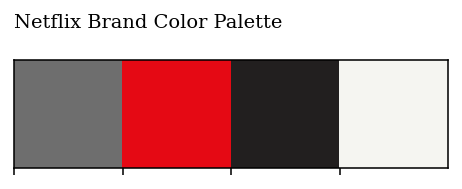

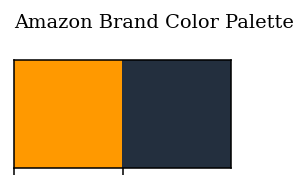

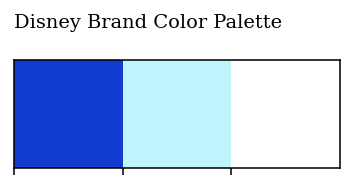

In [40]:
#sns.palplot(['#221f1f', '#b20710', '#e50914','#f5f5f1'])
#plt.title("Netflix Brand Color Pattle",loc='left',fontfamily='serif',fontsize=10,y=1.2)
#plt.show()

#sns.palplot(['#000000', '#FF9900'])
#plt.title("Amazon Brand Color Pattle",loc='left',fontfamily='serif',fontsize=10,y=1.2)
#plt.show()

#sns.palplot(['#113CCF', '#FFFFFF', '#BFF5FD'])
#plt.title("Disney Brand Color Pattle",loc='left',fontfamily='serif',fontsize=10,y=1.2)
#plt.show()


import seaborn as sns
import matplotlib.pyplot as plt

# Netflix Brand Color Palette
sns.palplot(['#6E6E6E', '#E50914', '#221F1F', '#F5F5F1'])
plt.title("Netflix Brand Color Palette", loc='left', fontfamily='serif', fontsize=10, y=1.2)
plt.show()

# Amazon Brand Color Palette
sns.palplot(['#FF9900', '#232F3E'])
plt.title("Amazon Brand Color Palette", loc='left', fontfamily='serif', fontsize=10, y=1.2)
plt.show()

# Disney Brand Color Palette
sns.palplot(['#113CCF', '#BFF5FD', '#FFFFFF'])
plt.title("Disney Brand Color Palette", loc='left', fontfamily='serif', fontsize=10, y=1.2)
plt.show()

### 2. Total Movies & TV-Shows

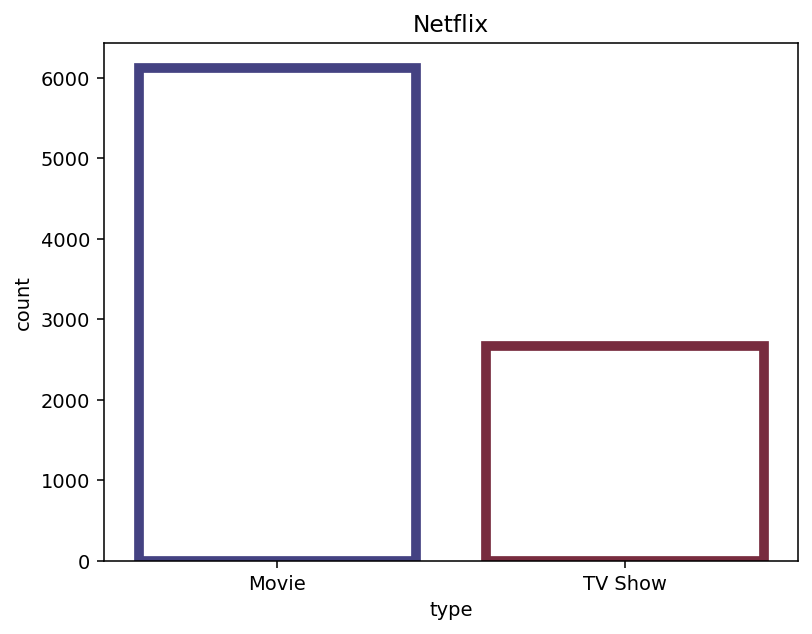

In [41]:
ax = sns.countplot(x=netflix['type'],data=netflix,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("icefire", 2)).set(title='Netflix')
plt.rcParams["figure.figsize"] = (3,3)
plt.rcParams["xtick.labelsize"] = 7
plt.rcParams["ytick.labelsize"] = 7
plt.show()


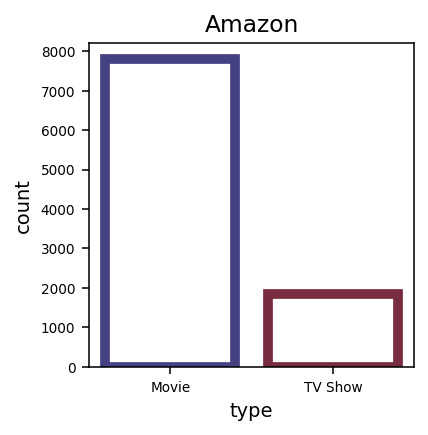

In [42]:

#Amazon
ax = sns.countplot(x="type",data=amazon,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("icefire", 2)).set(title='Amazon')
plt.rcParams["figure.figsize"] = (4,3)
plt.rcParams["xtick.labelsize"] = 7
plt.rcParams["ytick.labelsize"] = 7
plt.show()


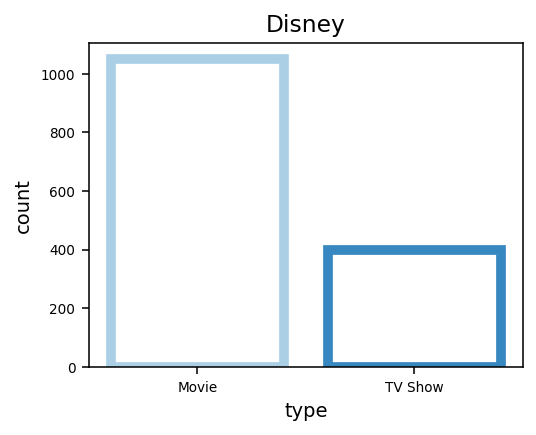

In [43]:

#Disney
ax = sns.countplot(x="type",data=disney,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("Blues", 2)).set(title='Disney')
plt.rcParams["figure.figsize"] = (3,3)
plt.rcParams["xtick.labelsize"] = 7
plt.rcParams["ytick.labelsize"] = 7
plt.show()

### Content Update Over the Time

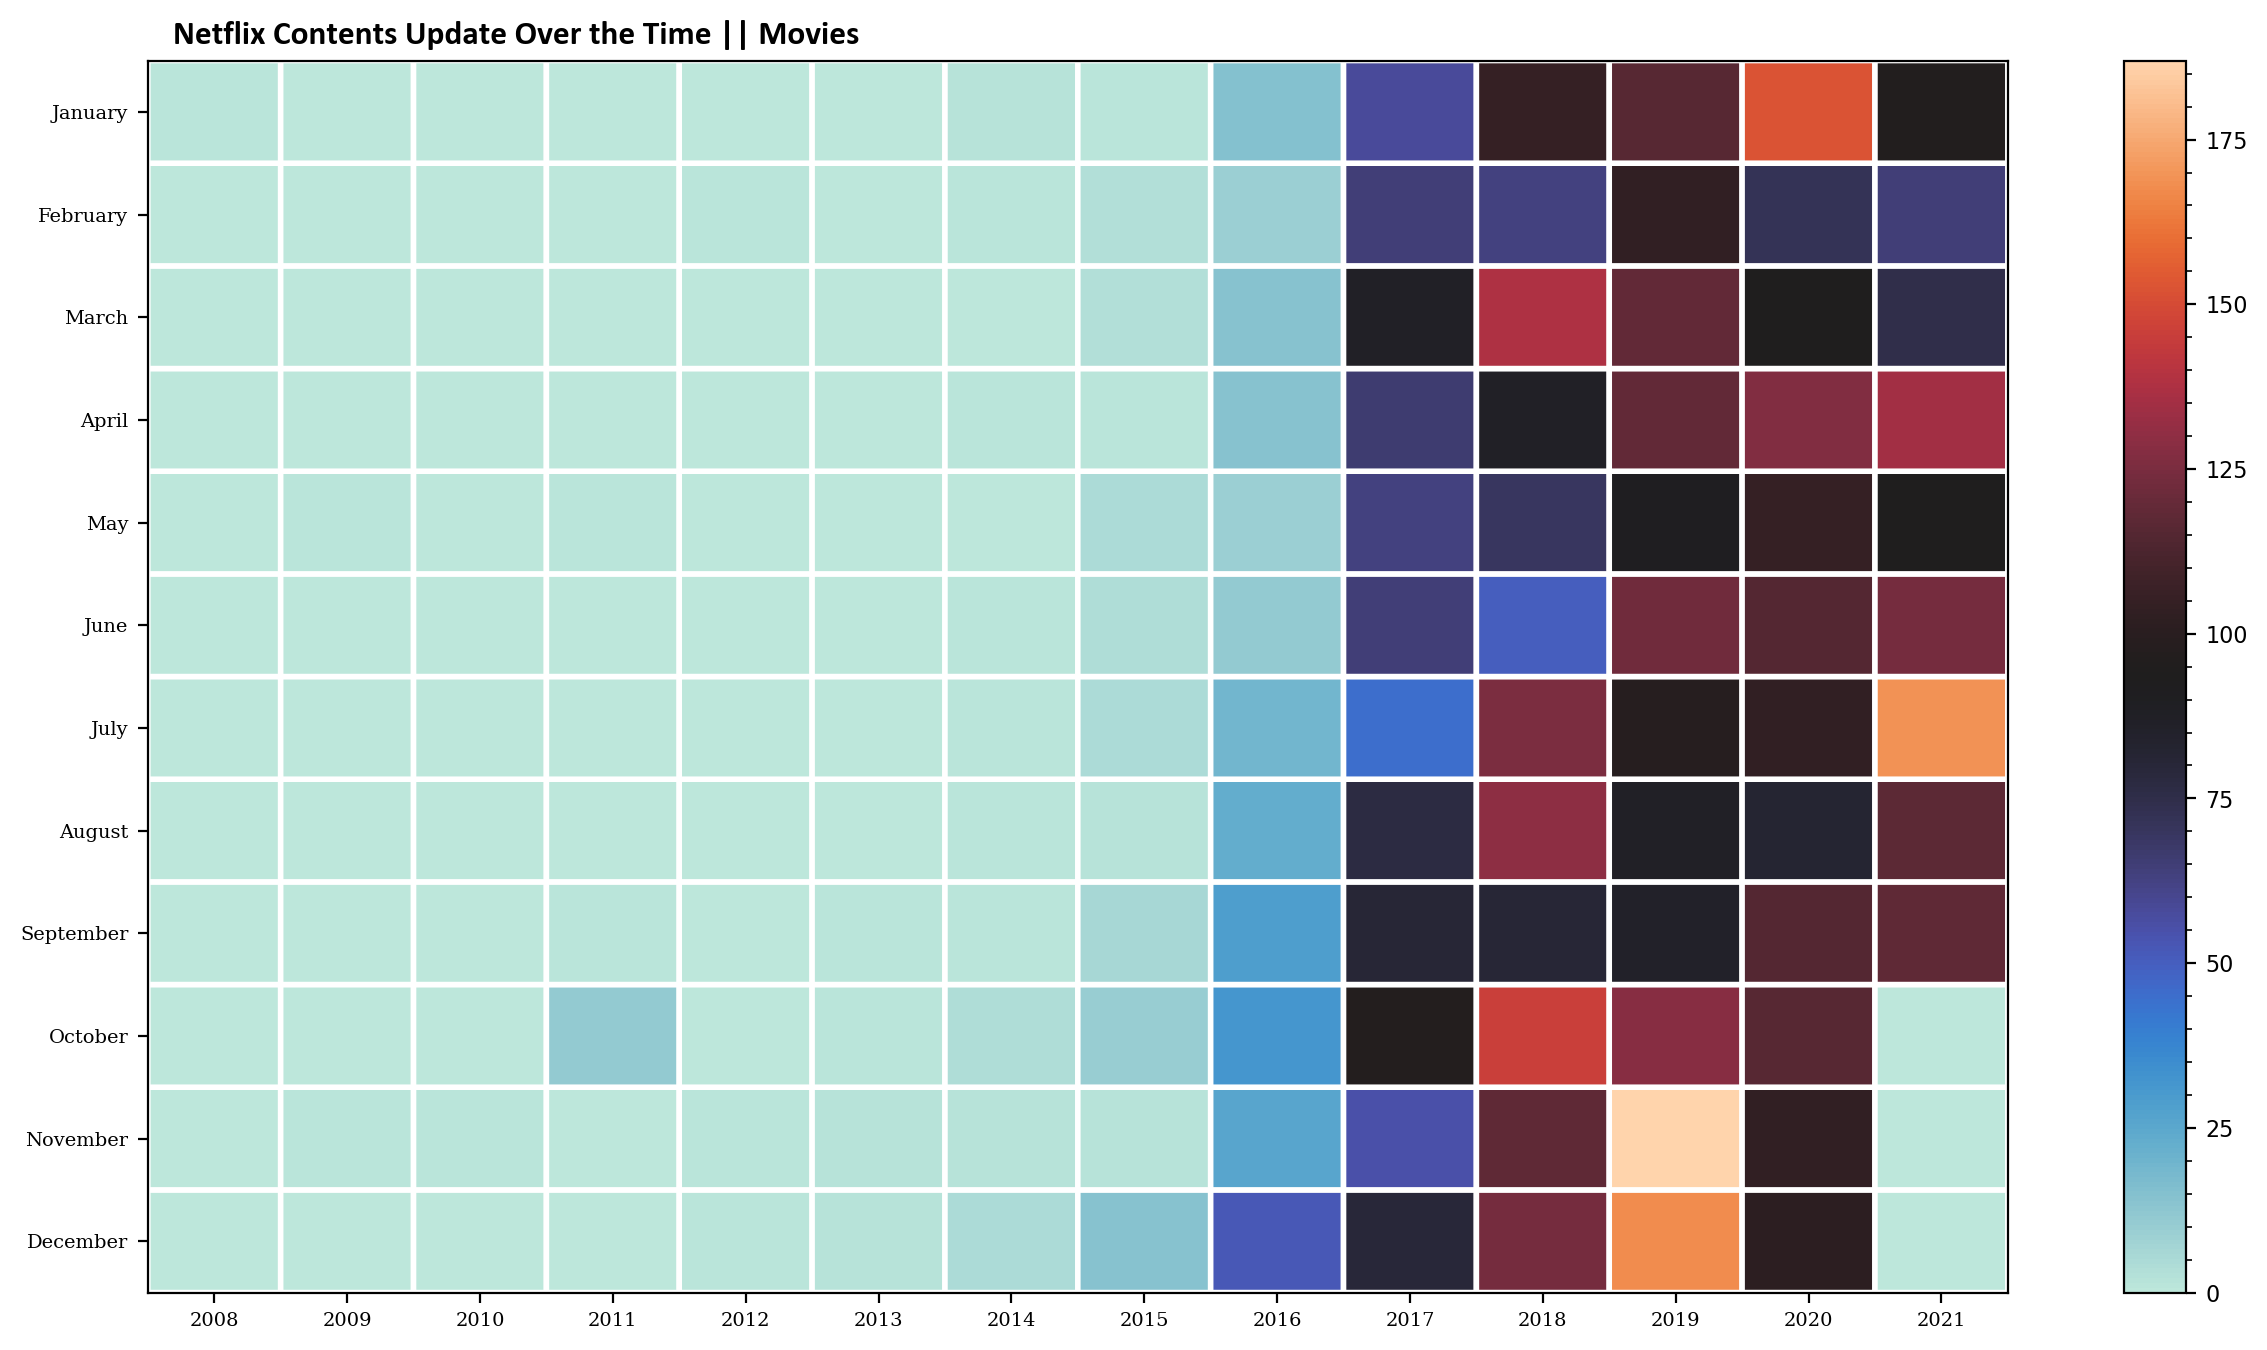

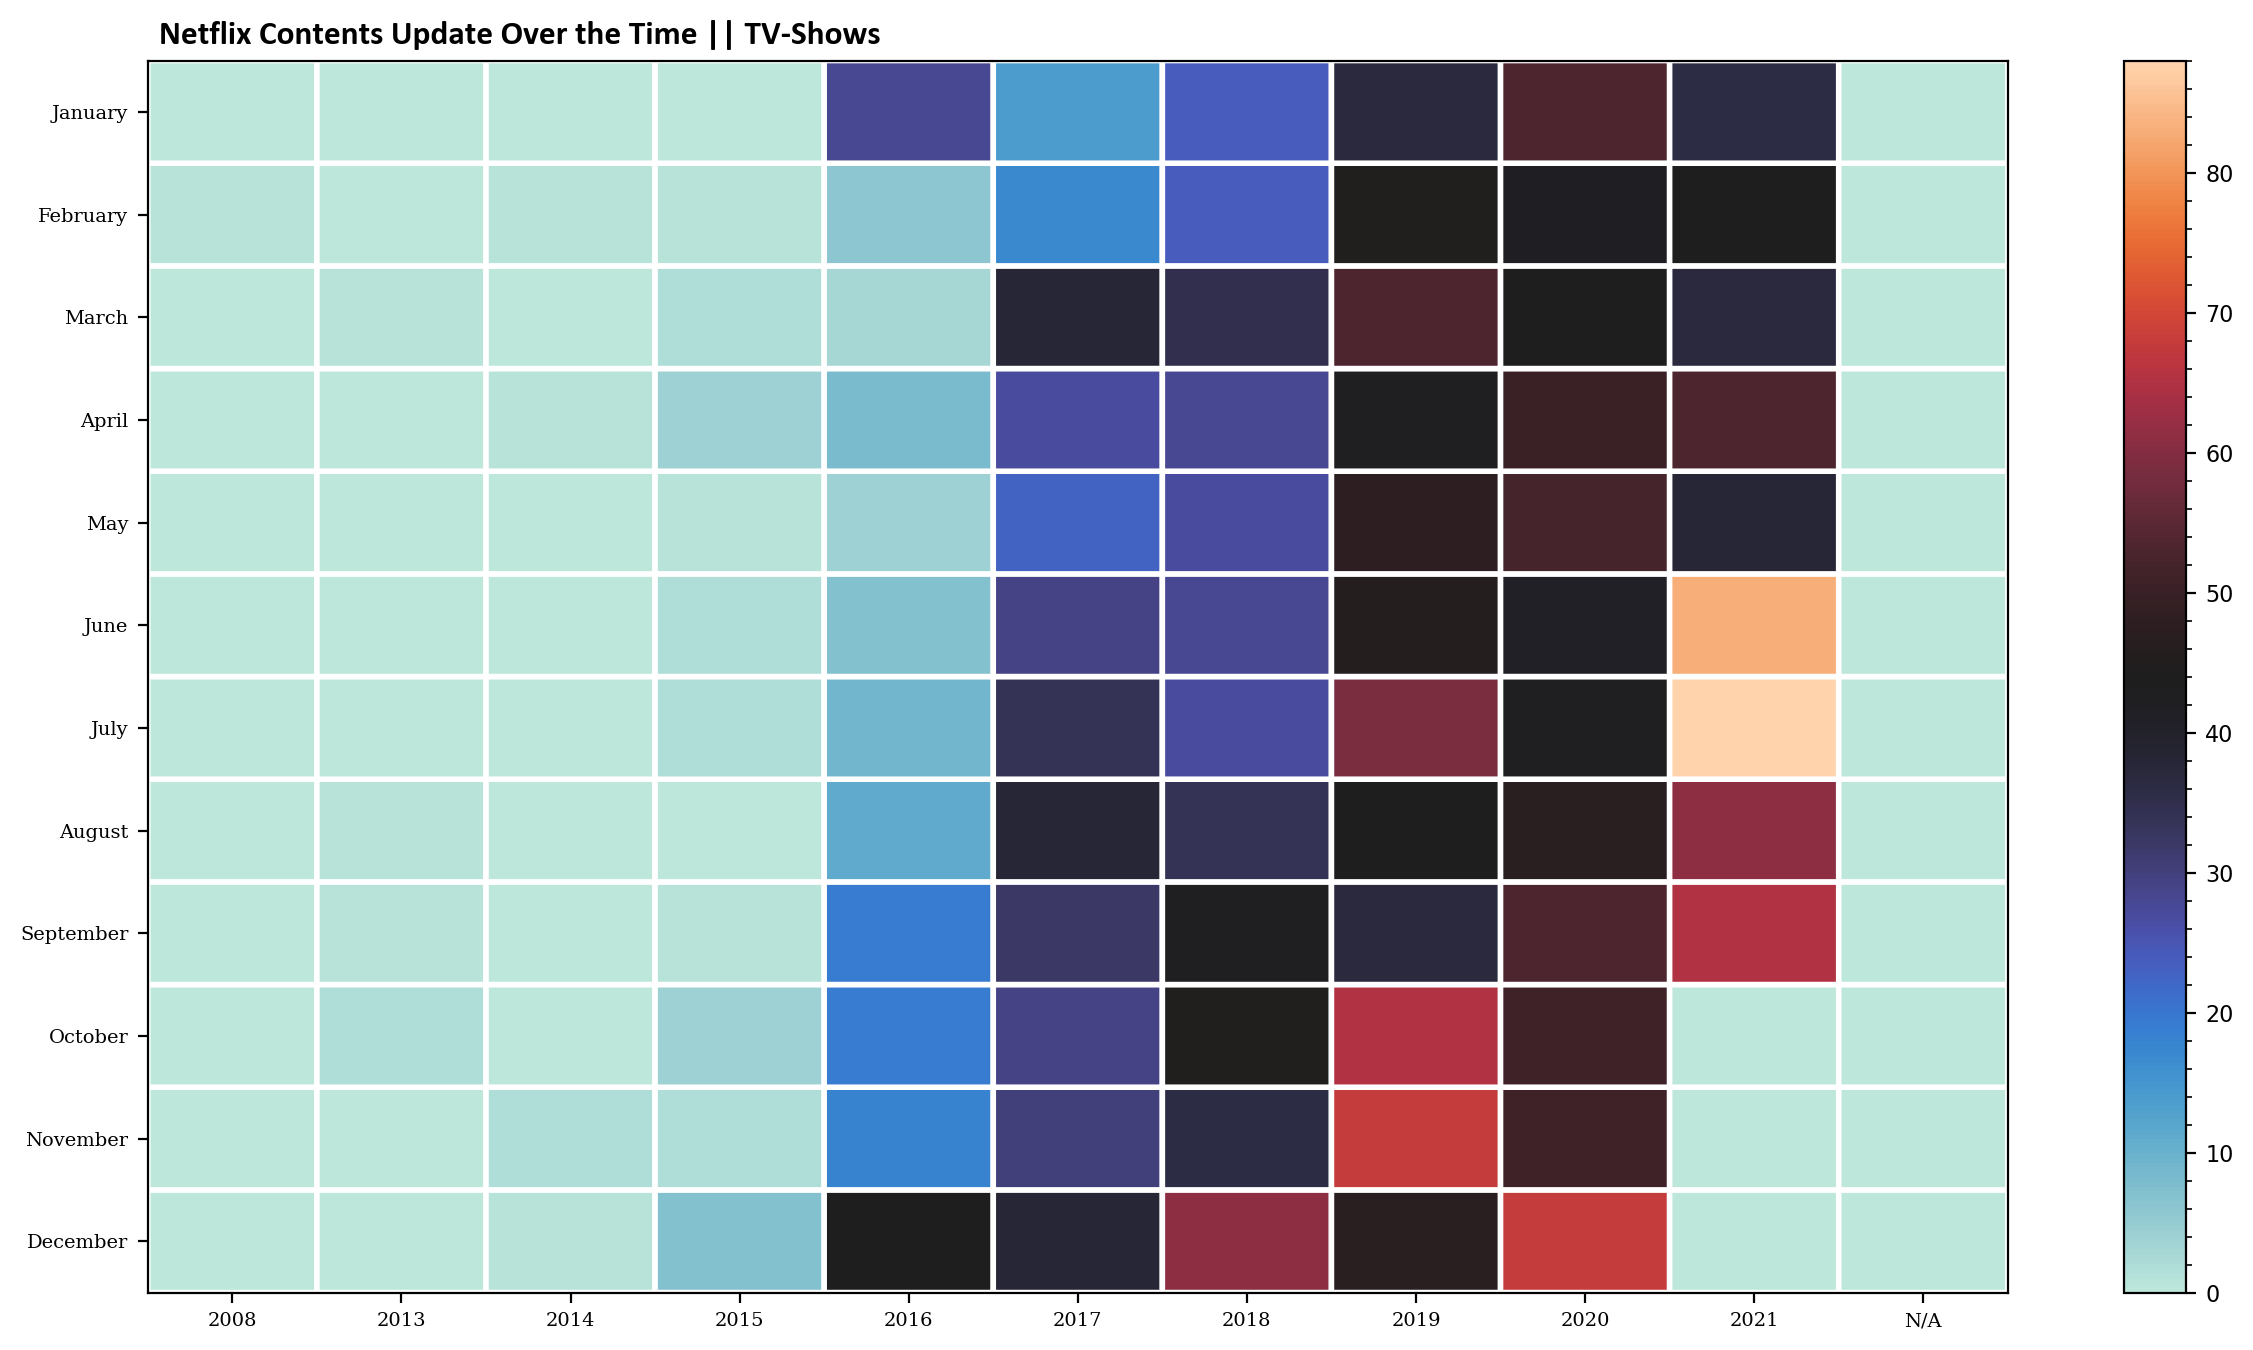

In [44]:
#For Example
#Netflix
n_date = netflix_movies[['date_added']].dropna()
n_date['year'] = n_date['date_added'].apply(lambda x : x.split(', ')[-1])
n_date['month'] = n_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
netflix = n_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(15, 8), dpi=200)
plt.pcolor(netflix, cmap='icefire', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(netflix.columns), 1), netflix.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(netflix.index), 1), netflix.index, fontsize=7, fontfamily='serif')
plt.title('Netflix Contents Update Over the Time || Movies ', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

n_date = netflix_shows[['date_added']].dropna()
n_date['year'] = n_date['date_added'].apply(lambda x : x.split(', ')[-1])
n_date['month'] = n_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
netflix = n_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(15, 8), dpi=200)
plt.pcolor(netflix, cmap='icefire', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(netflix.columns), 1), netflix.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(netflix.index), 1), netflix.index, fontsize=7, fontfamily='serif')
plt.title('Netflix Contents Update Over the Time || TV-Shows', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

### Movie rating Analysis

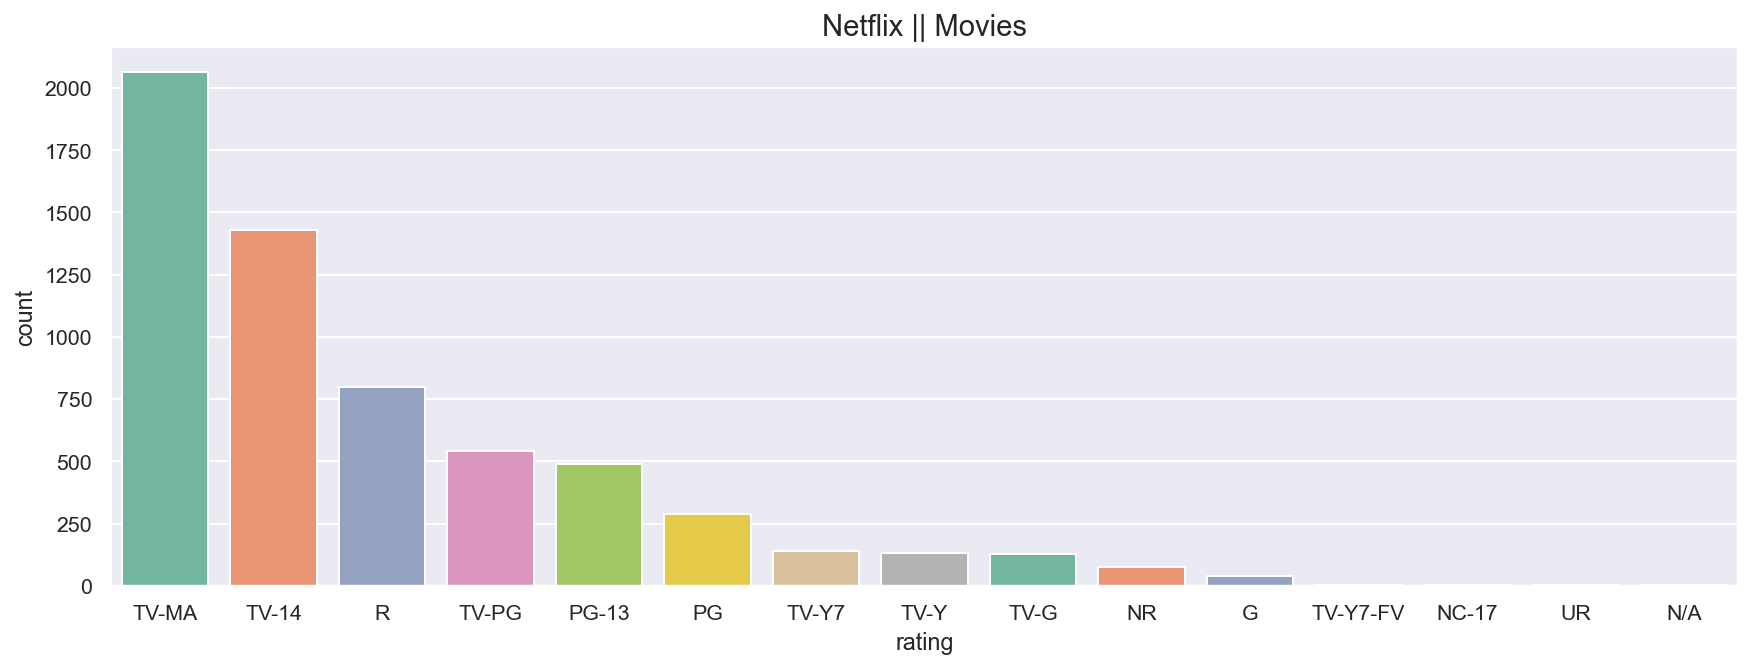

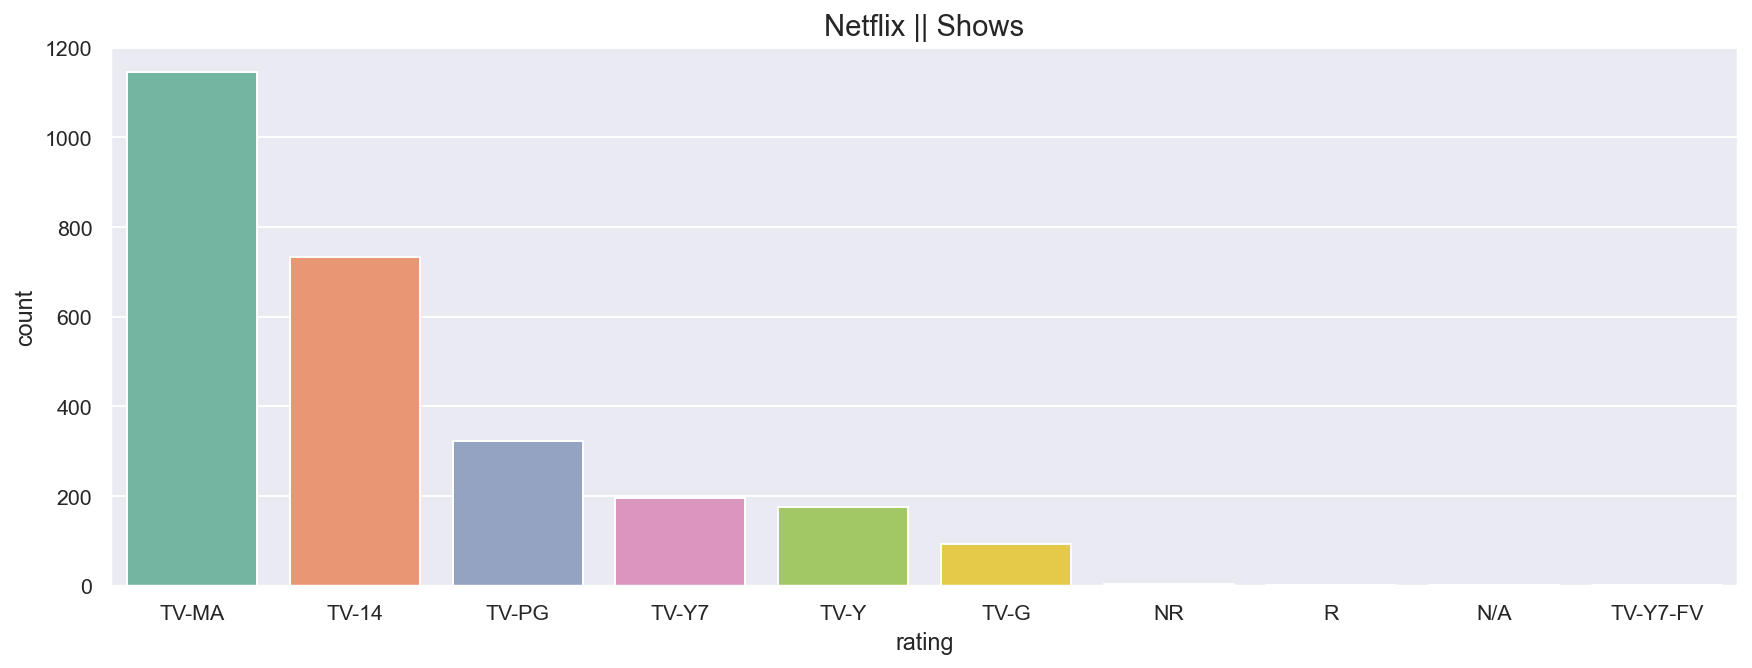

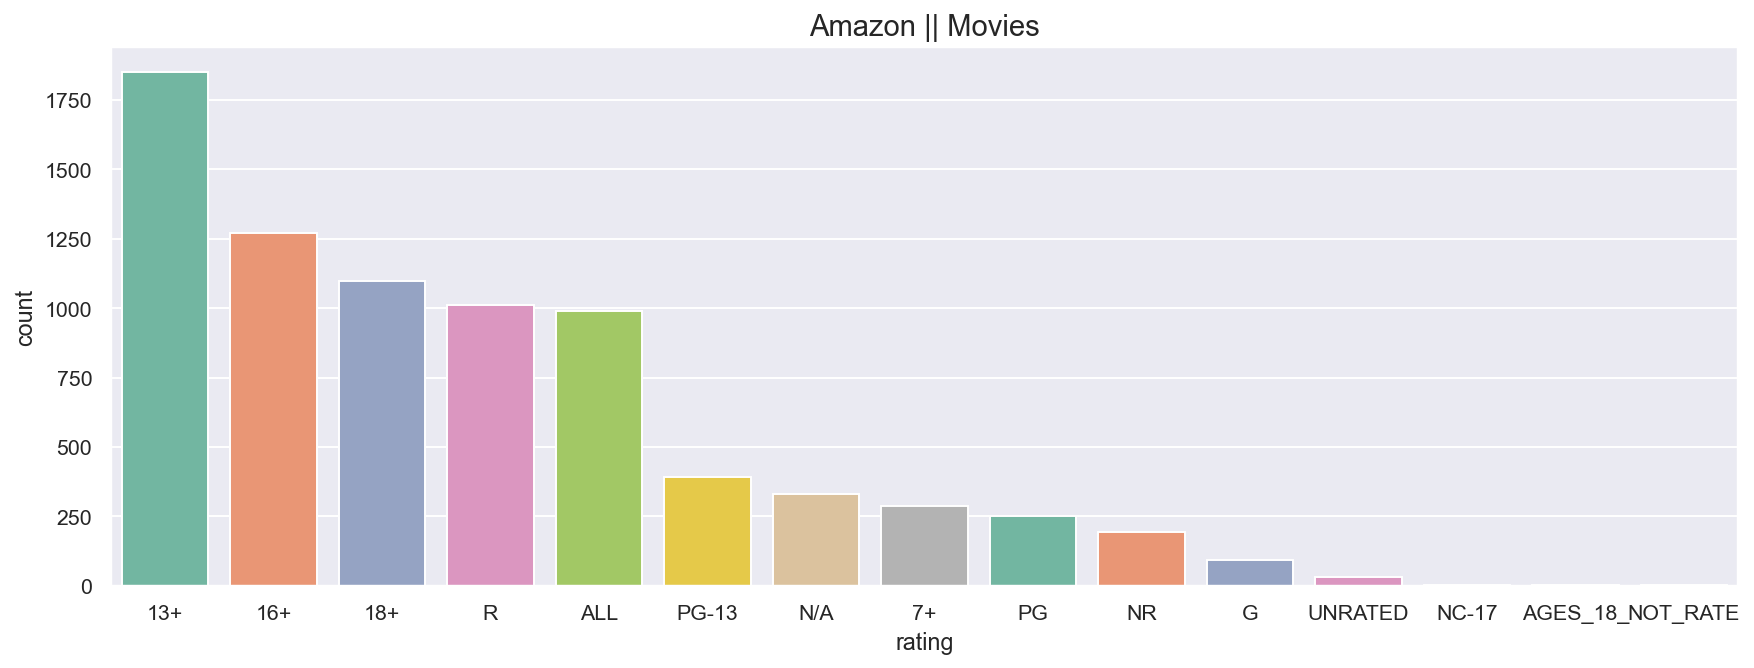

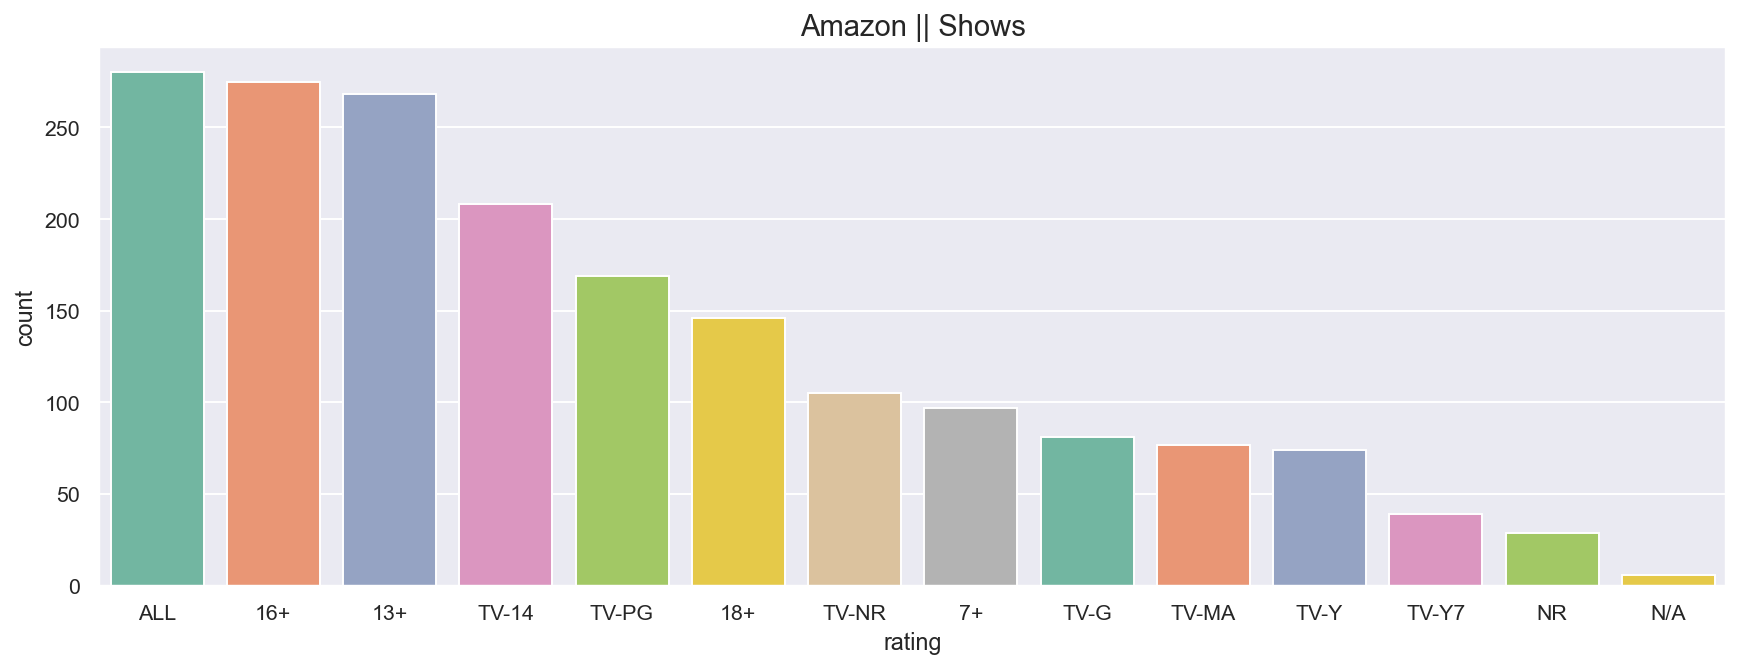

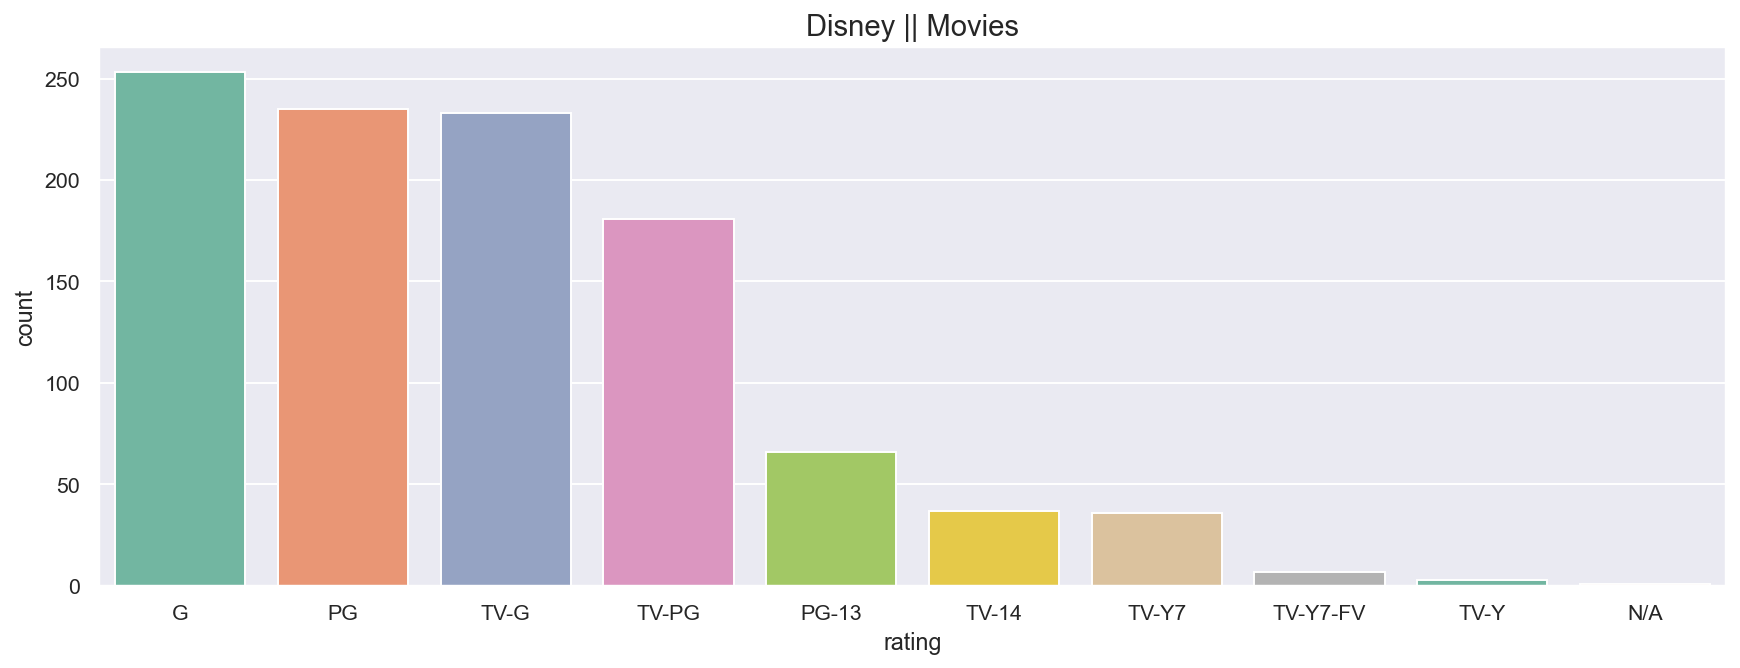

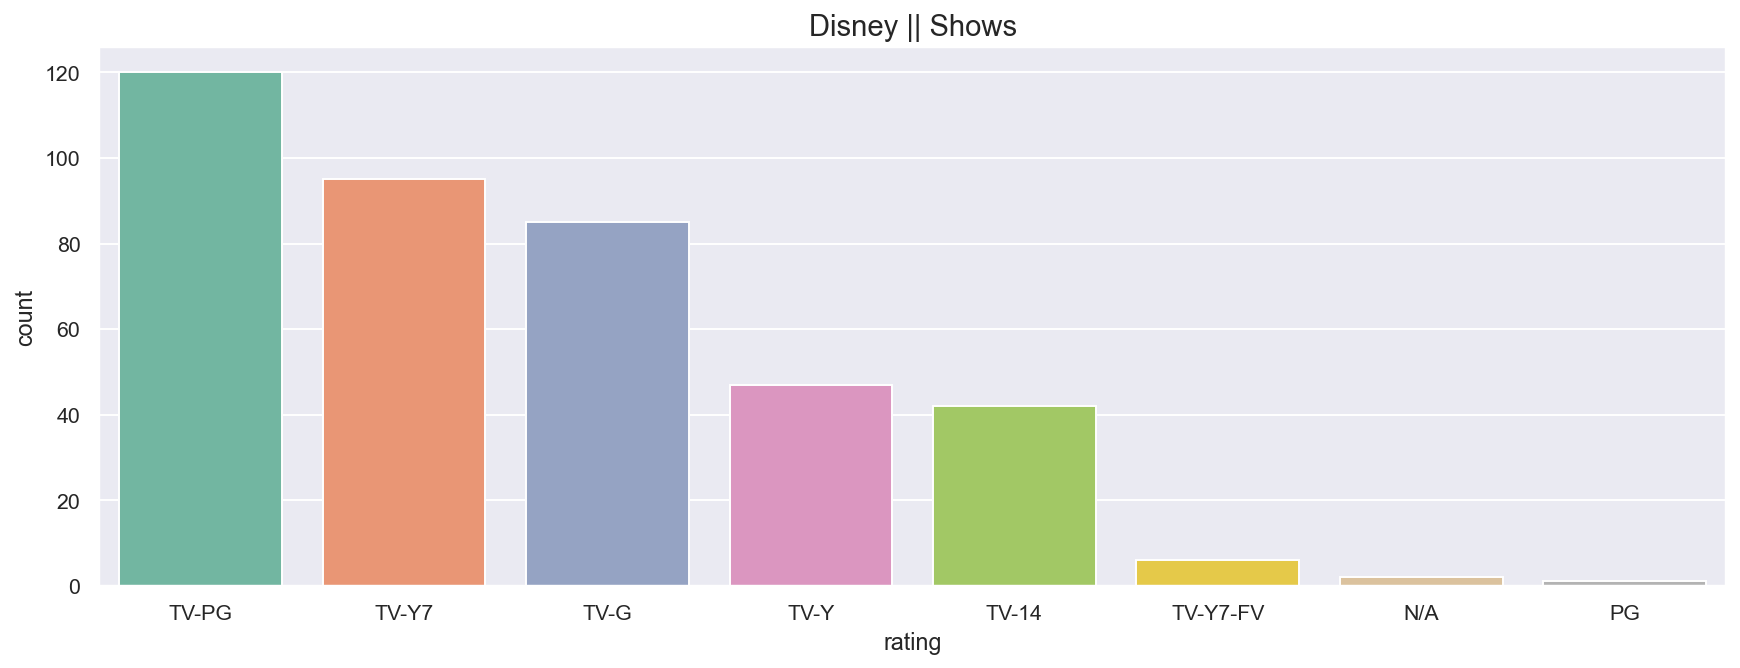

In [45]:
#NETFLIX
plt.figure(figsize=(15,5))
sns.set(style="darkgrid")
plt.title('Netflix || Movies',size="15")
sns.countplot(x="rating", data=netflix_movies, palette="Set2", order=netflix_movies['rating'].value_counts().index[0:15])
plt.show()

plt.figure(figsize=(15,5))
sns.set(style="darkgrid")
plt.title('Netflix || Shows',size="15")
sns.countplot(x="rating", data=netflix_shows, palette="Set2", order=netflix_shows['rating'].value_counts().index[0:15])
plt.show()

#AMAZON
plt.figure(figsize=(15,5))
sns.set(style="darkgrid")
plt.title('Amazon || Movies',size="15")
sns.countplot(x="rating", data=amazon_movies, palette="Set2", order=amazon_movies['rating'].value_counts().index[0:15])
plt.show()

plt.figure(figsize=(15,5))
sns.set(style="darkgrid")
plt.title('Amazon || Shows',size="15")
sns.countplot(x="rating", data=amazon_shows, palette="Set2", order=amazon_shows['rating'].value_counts().index[0:15])
plt.show()

#DISNEY
plt.figure(figsize=(15,5))
sns.set(style="darkgrid")
plt.title('Disney || Movies',size="15")
sns.countplot(x="rating", data=disney_movies, palette="Set2", order=disney_movies['rating'].value_counts().index[0:15])
plt.show()

plt.figure(figsize=(15,5))
sns.set(style="darkgrid")
plt.title('Disney || Shows',size="15")
sns.countplot(x="rating", data=disney_shows, palette="Set2", order=disney_shows['rating'].value_counts().index[0:15])
plt.show()

### Year Wise Analysis

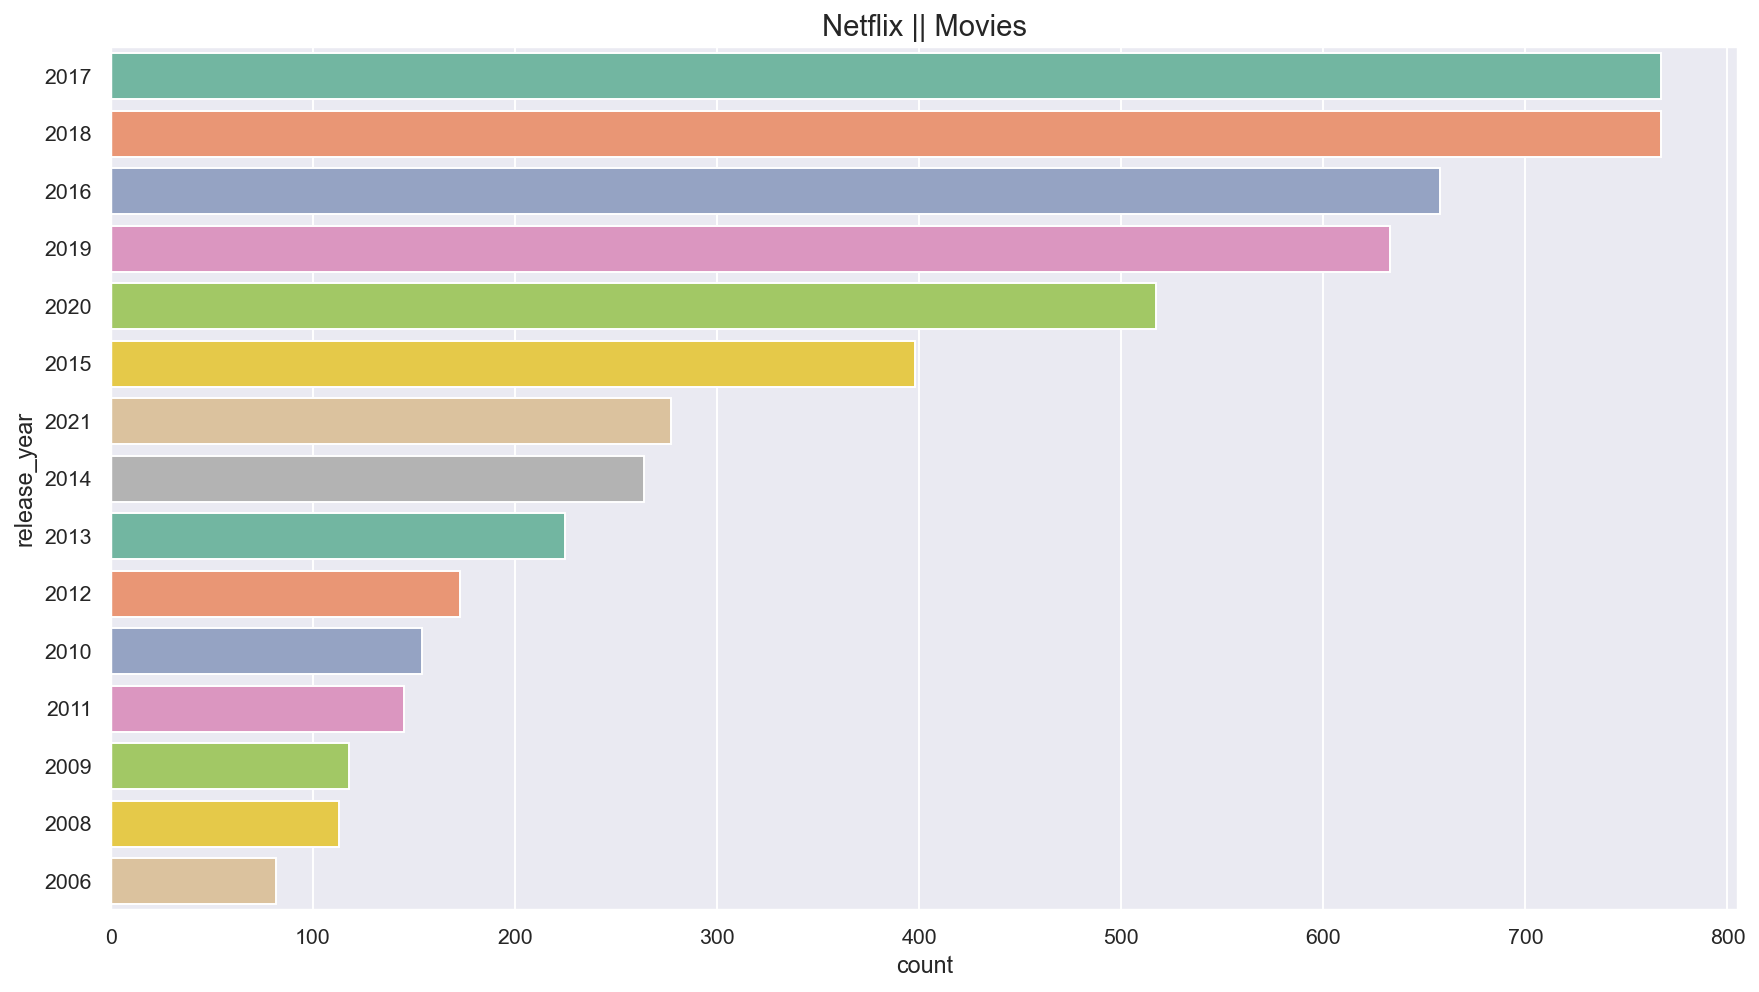

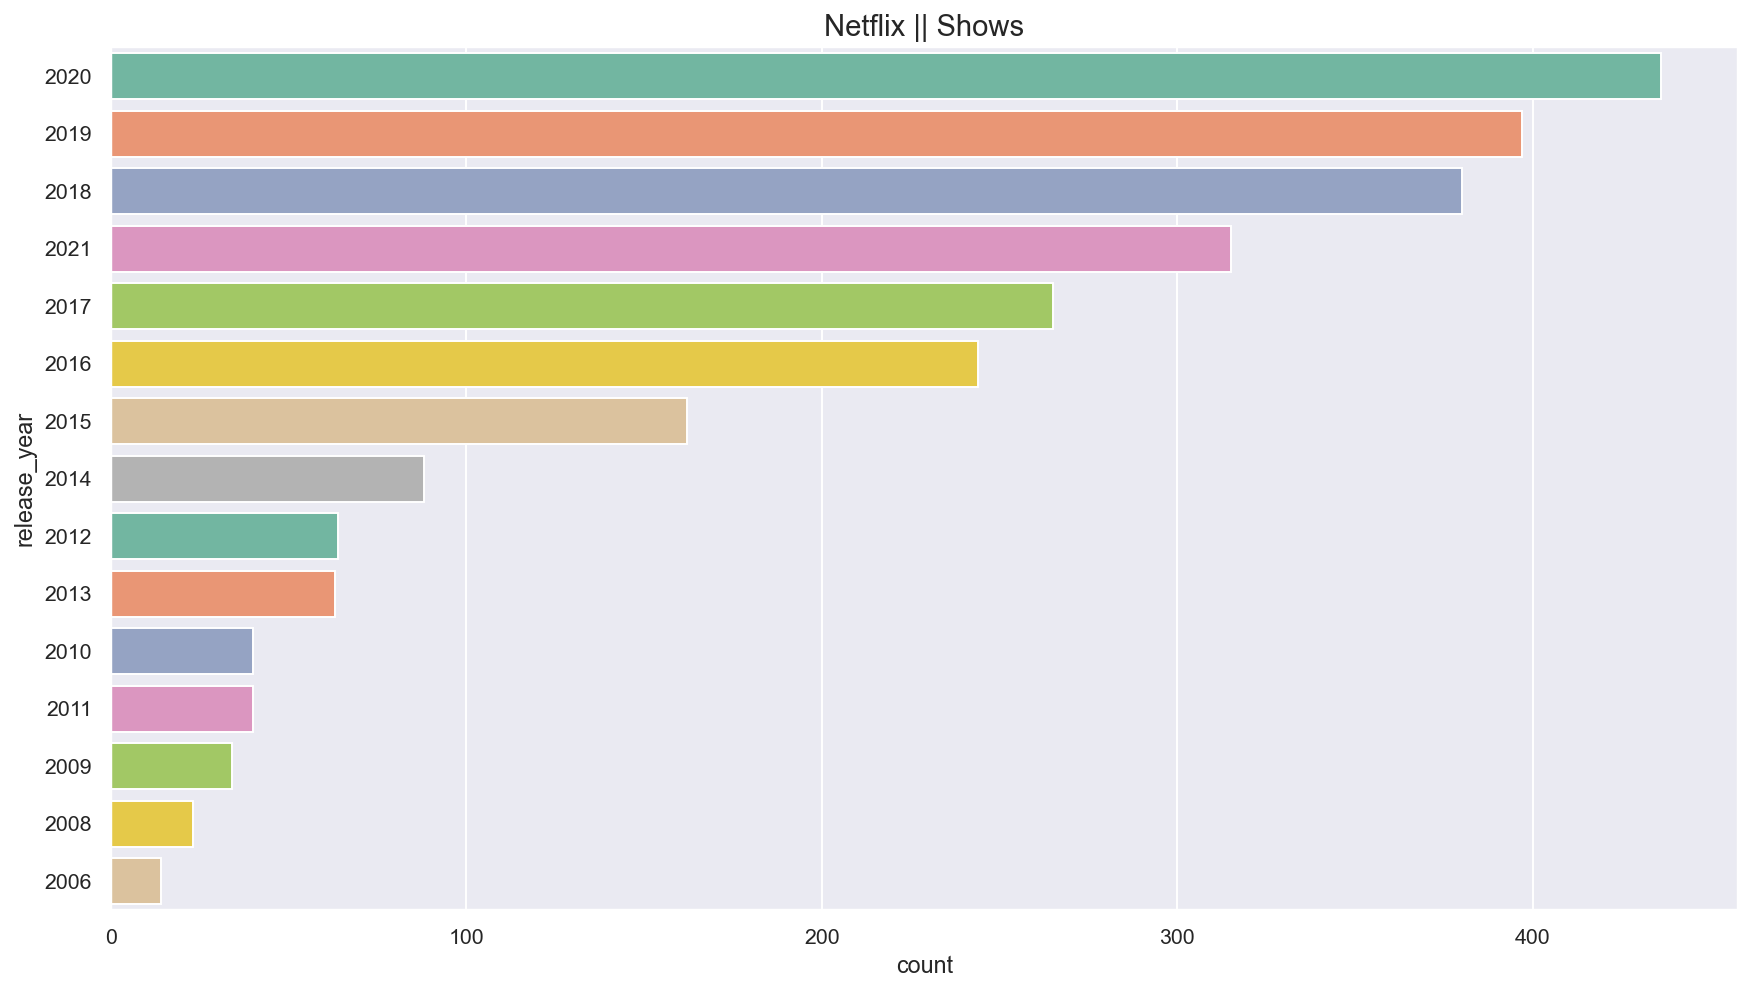

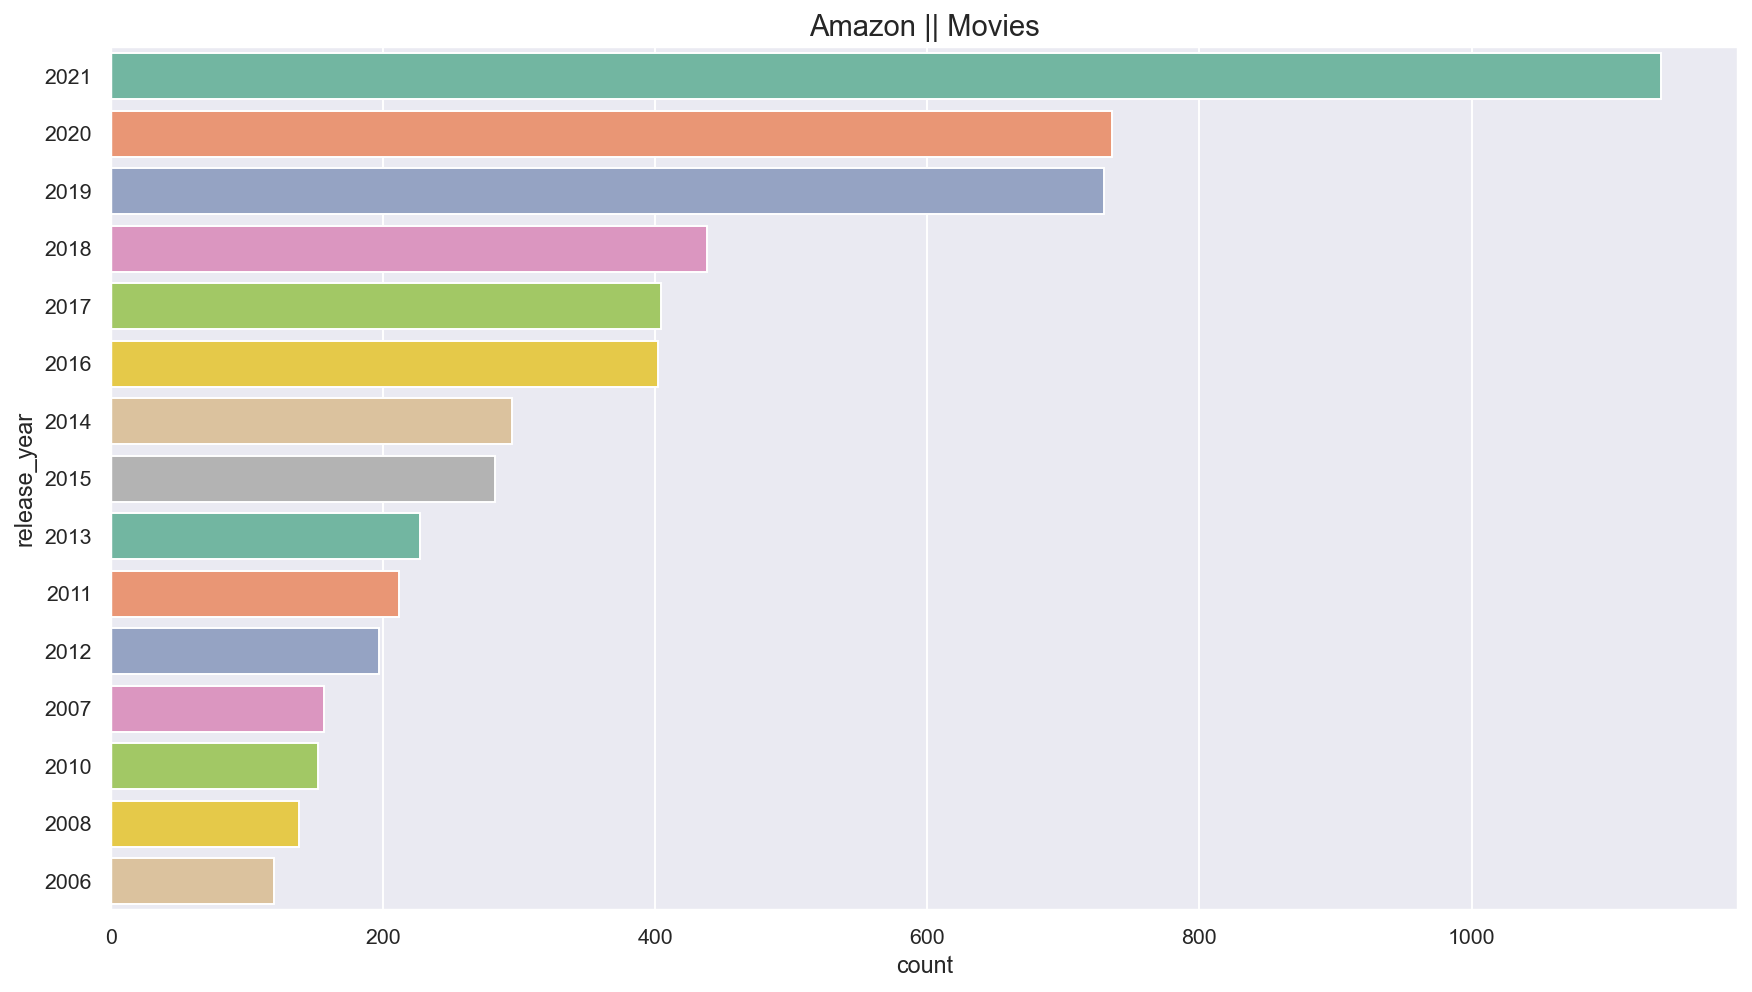

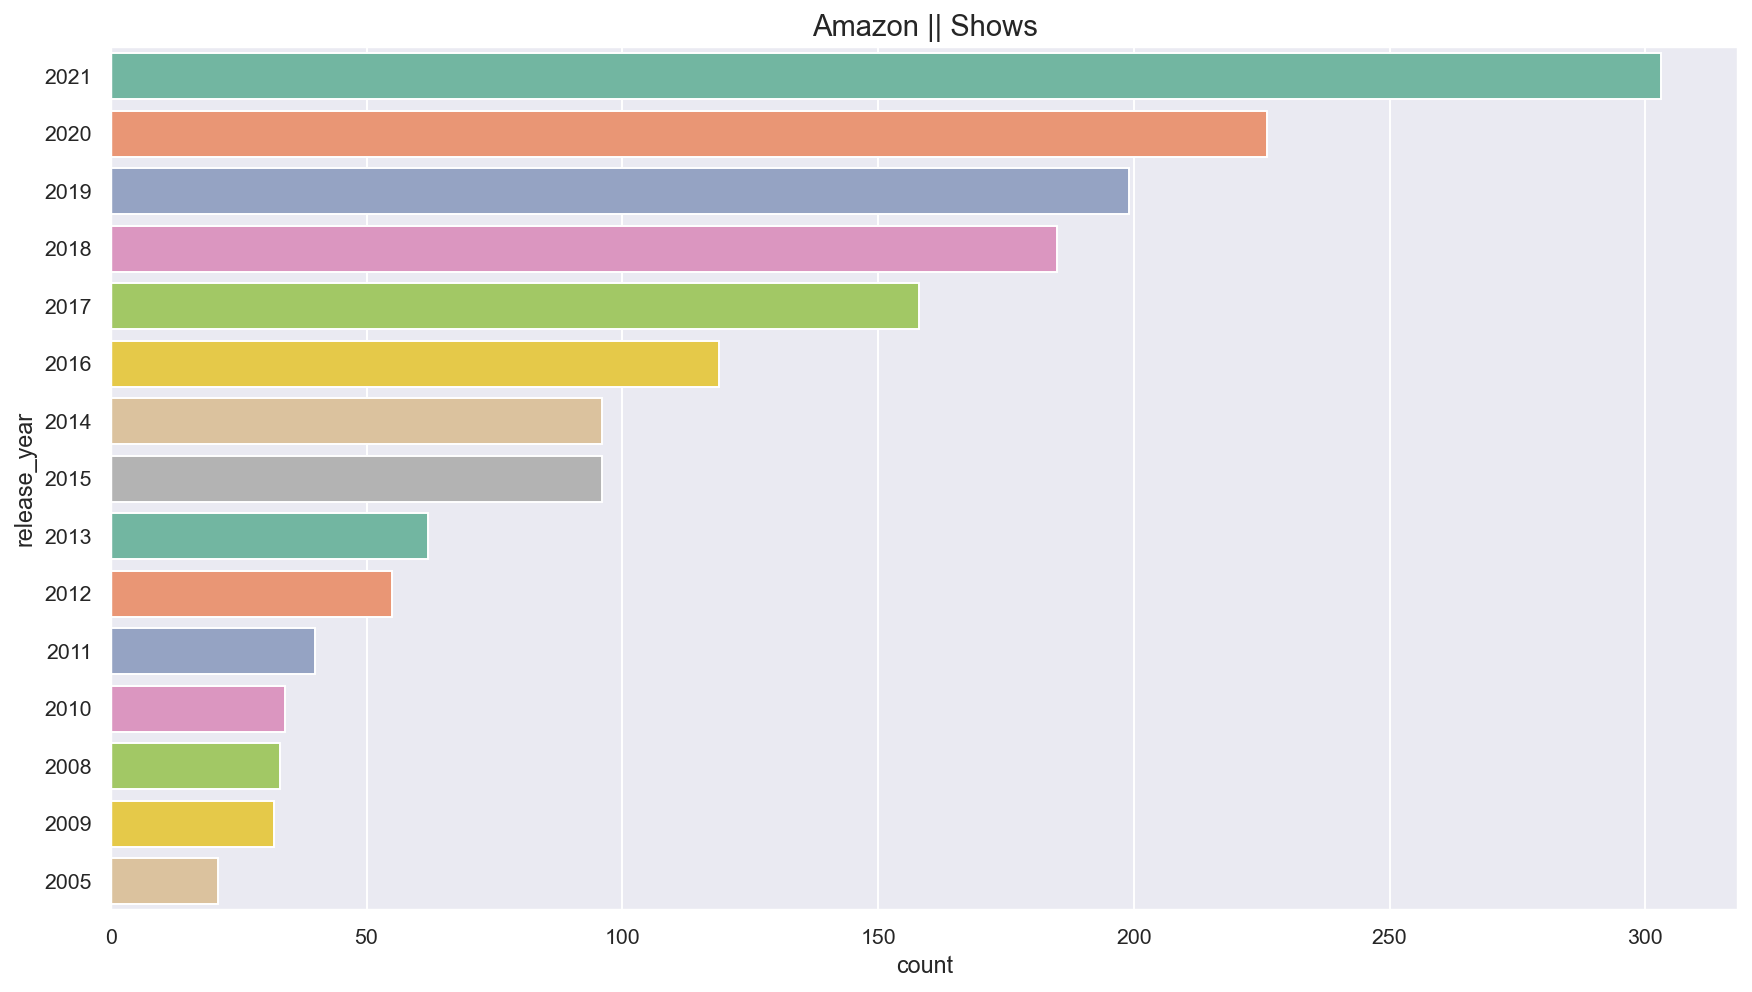

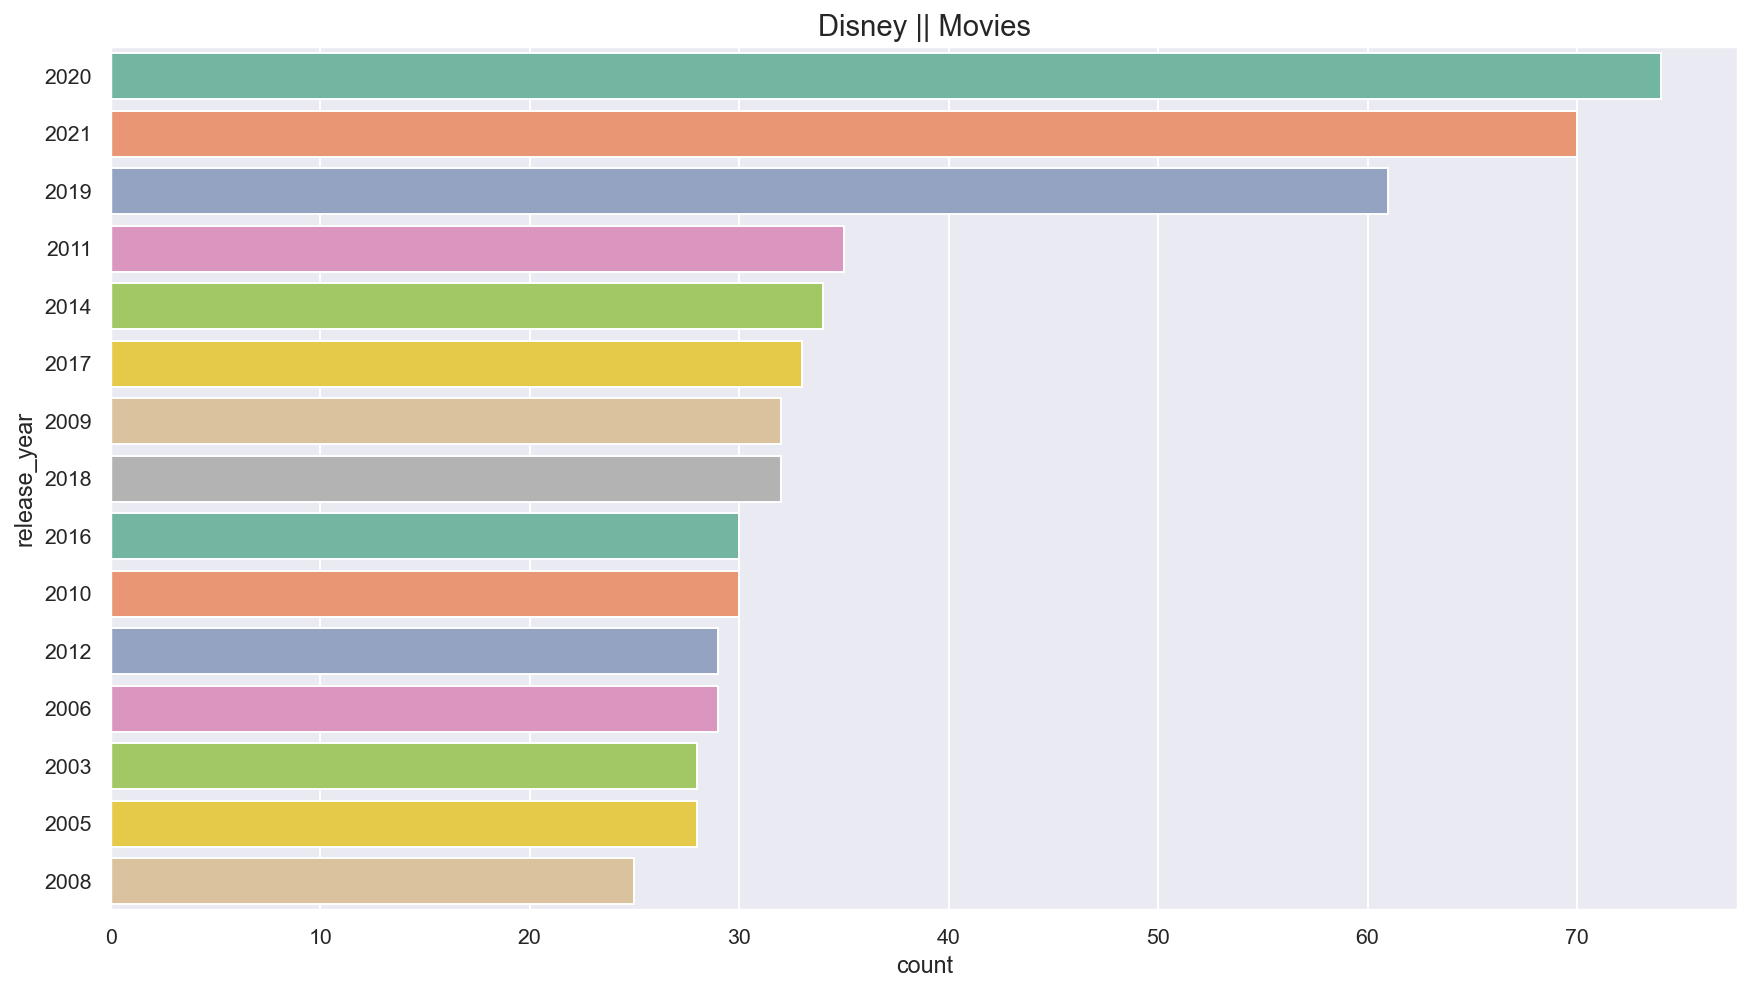

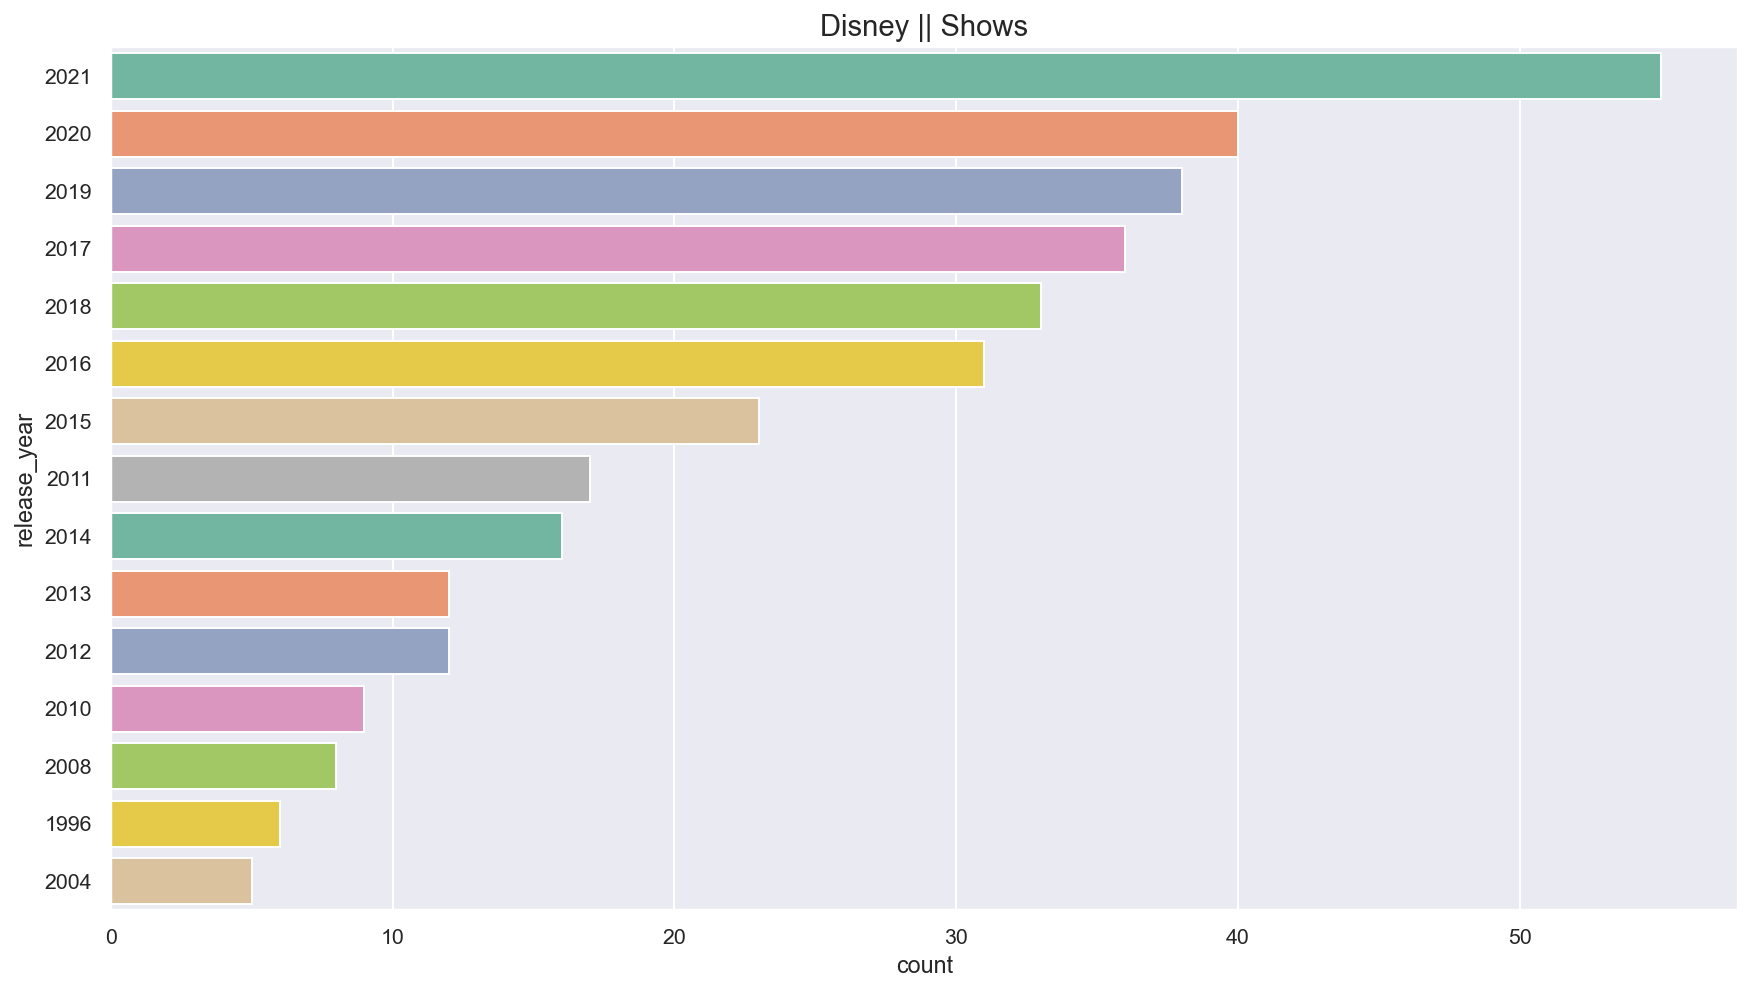

In [46]:
#NETFLIX
plt.figure(figsize=(15,8))
plt.title('Netflix || Movies',size="15")
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=netflix_movies, palette="Set2", order=netflix_movies['release_year'].value_counts().index[0:15])

plt.figure(figsize=(15,8))
plt.title('Netflix || Shows',size="15")
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=netflix_shows, palette="Set2", order=netflix_shows['release_year'].value_counts().index[0:15])

#AMAZON
plt.figure(figsize=(15,8))
plt.title('Amazon || Movies',size="15")
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=amazon_movies, palette="Set2", order=amazon_movies['release_year'].value_counts().index[0:15])

plt.figure(figsize=(15,8))
plt.title('Amazon || Shows',size="15")
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=amazon_shows, palette="Set2", order=amazon_shows['release_year'].value_counts().index[0:15])


#DISNEY
plt.figure(figsize=(15,8))
plt.title('Disney || Movies',size="15")
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=disney_movies, palette="Set2", order=disney_movies['release_year'].value_counts().index[0:15])

plt.figure(figsize=(15,8))
plt.title('Disney || Shows',size="15")
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=disney_shows, palette="Set2", order=disney_shows['release_year'].value_counts().index[0:15])

## Top 10 Content Creating Country's 

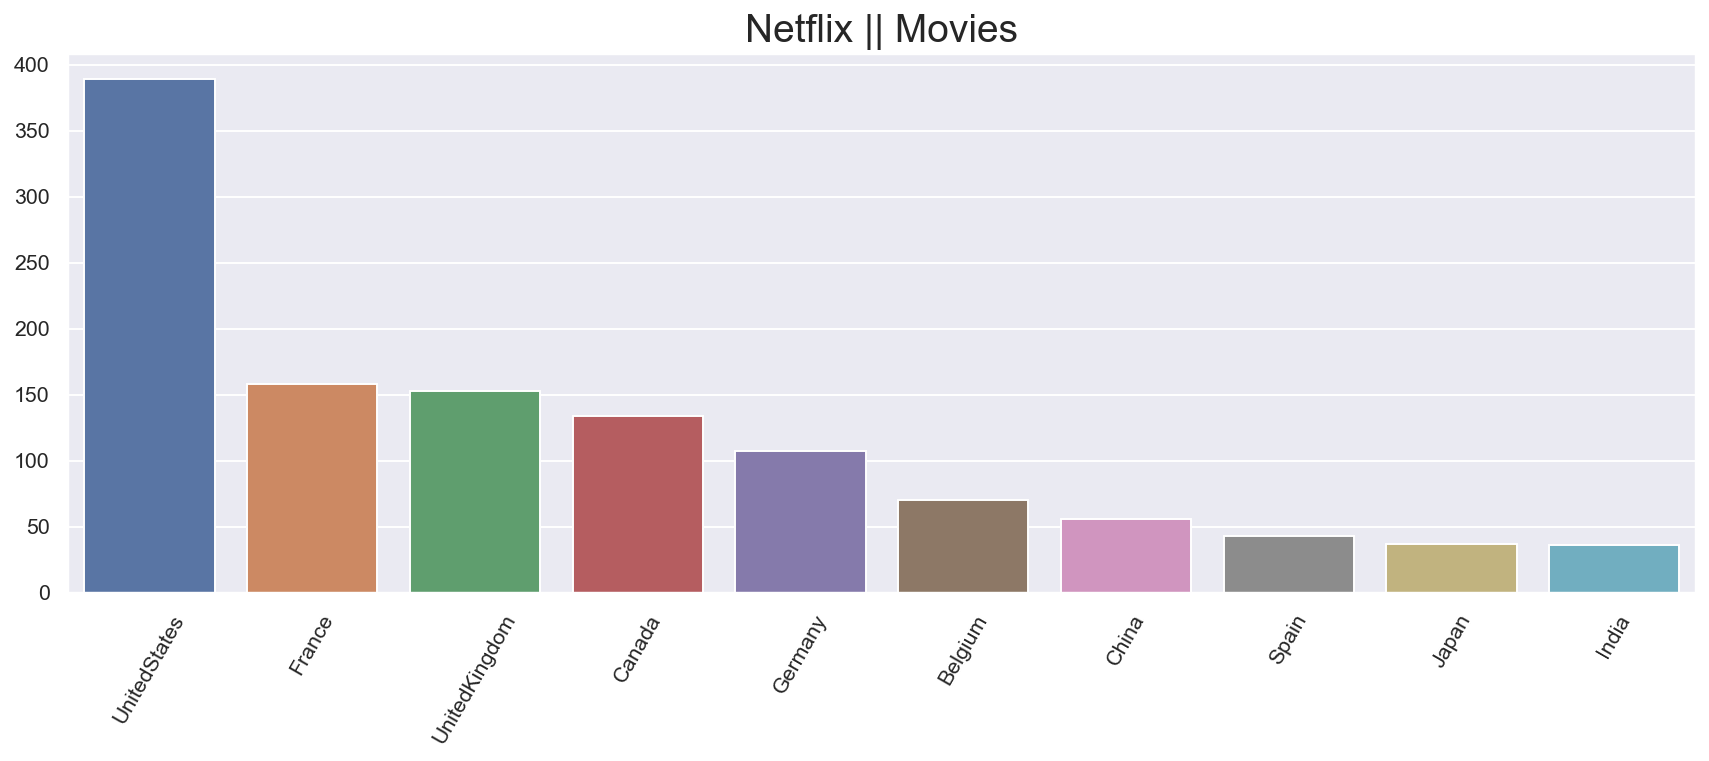

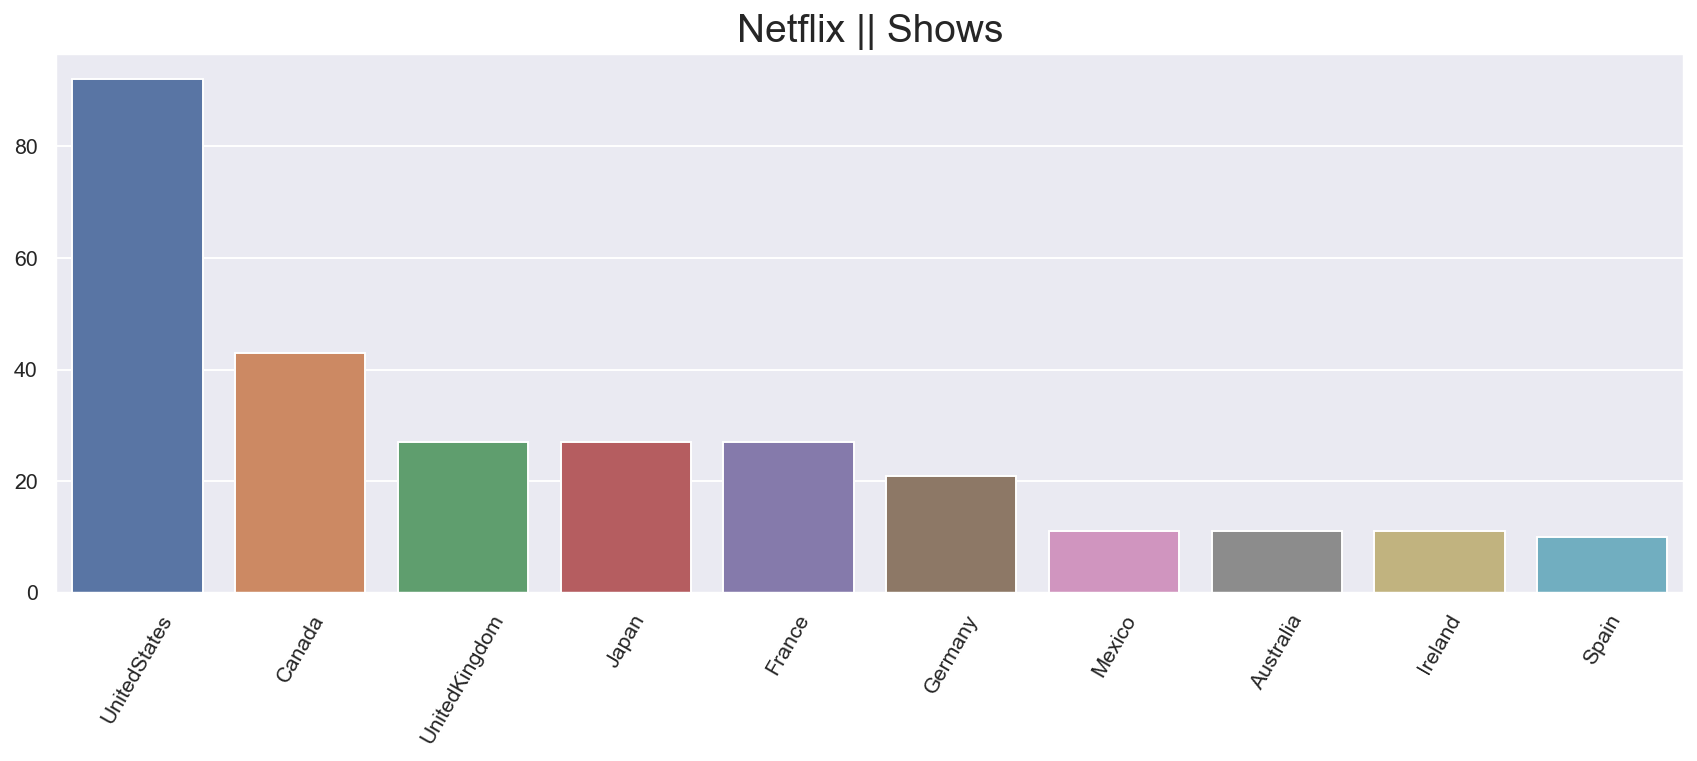

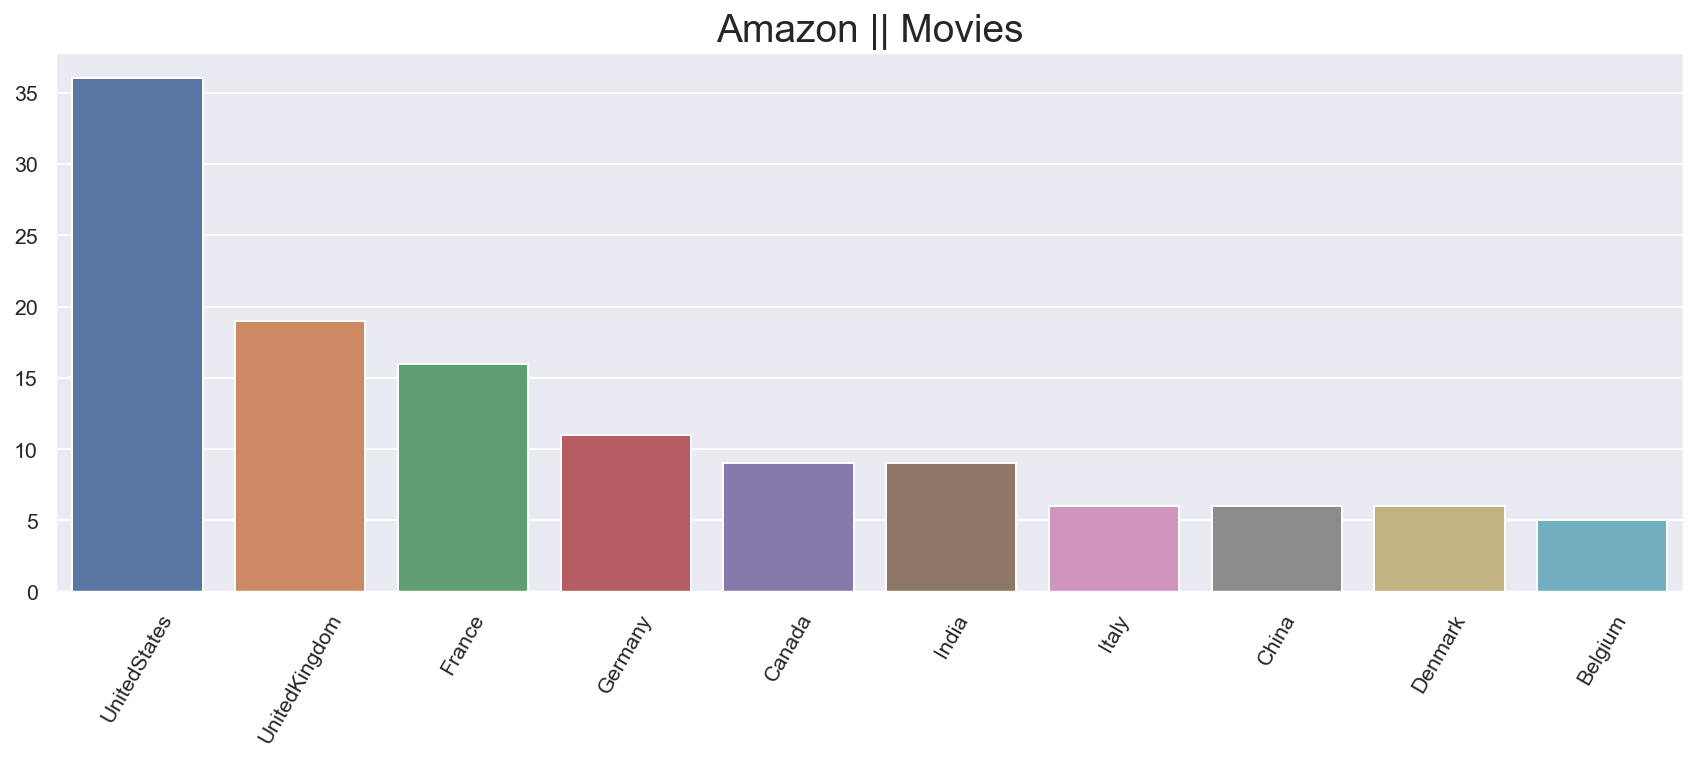

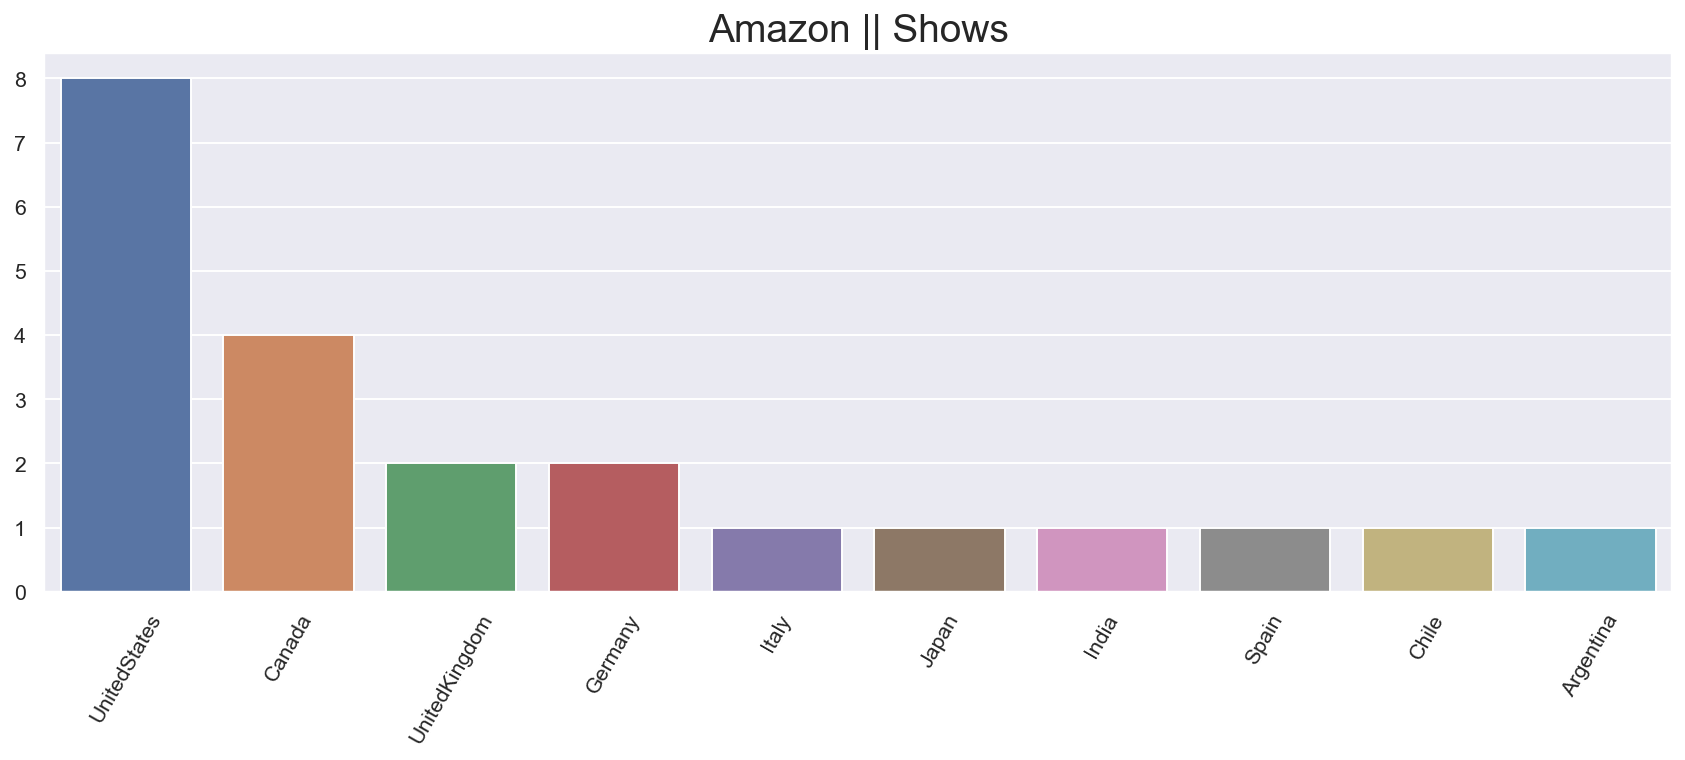

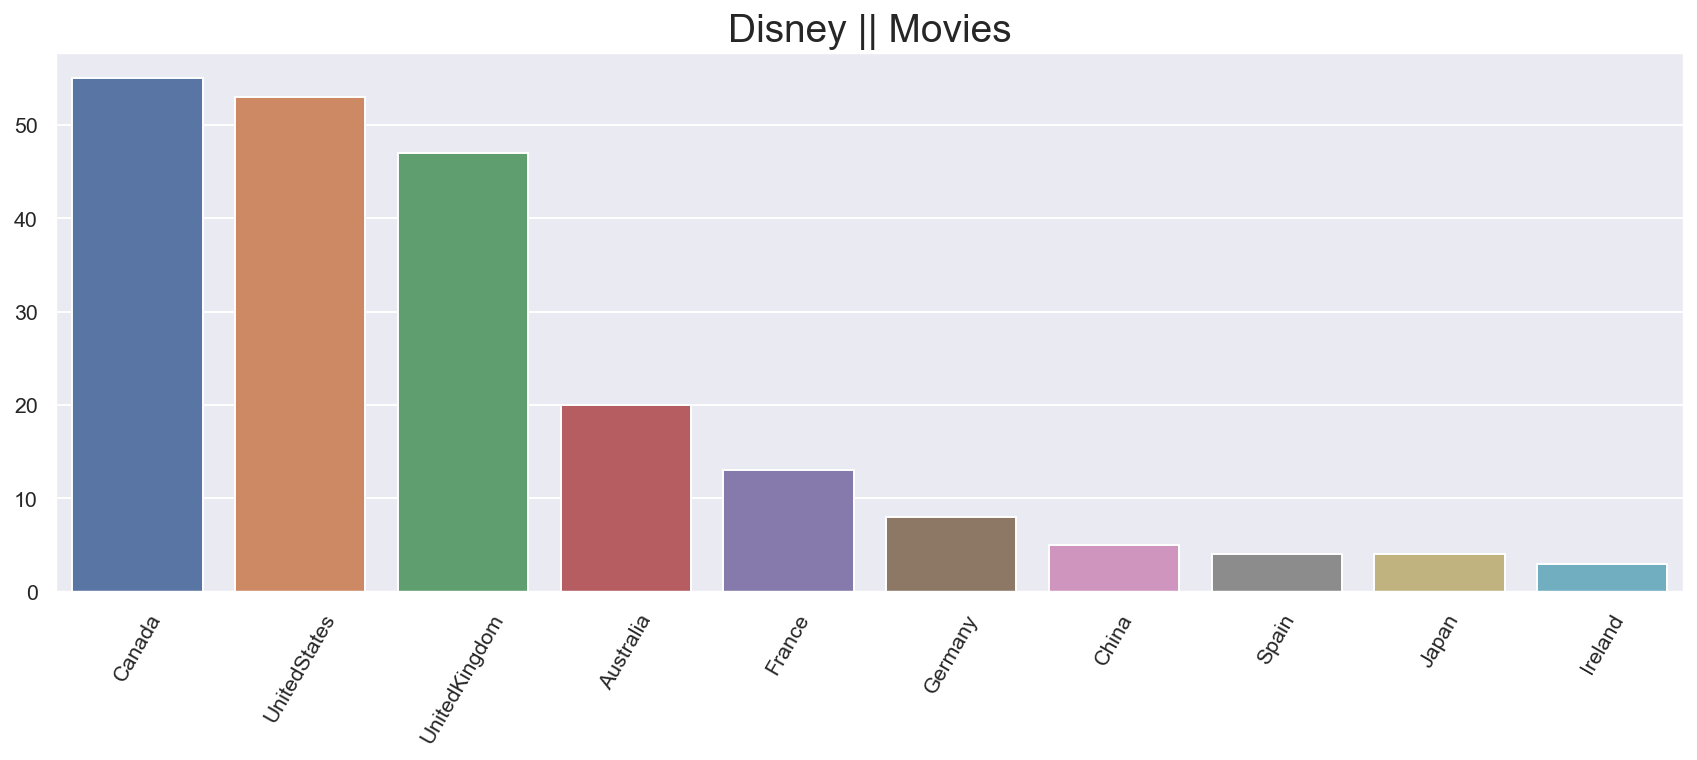

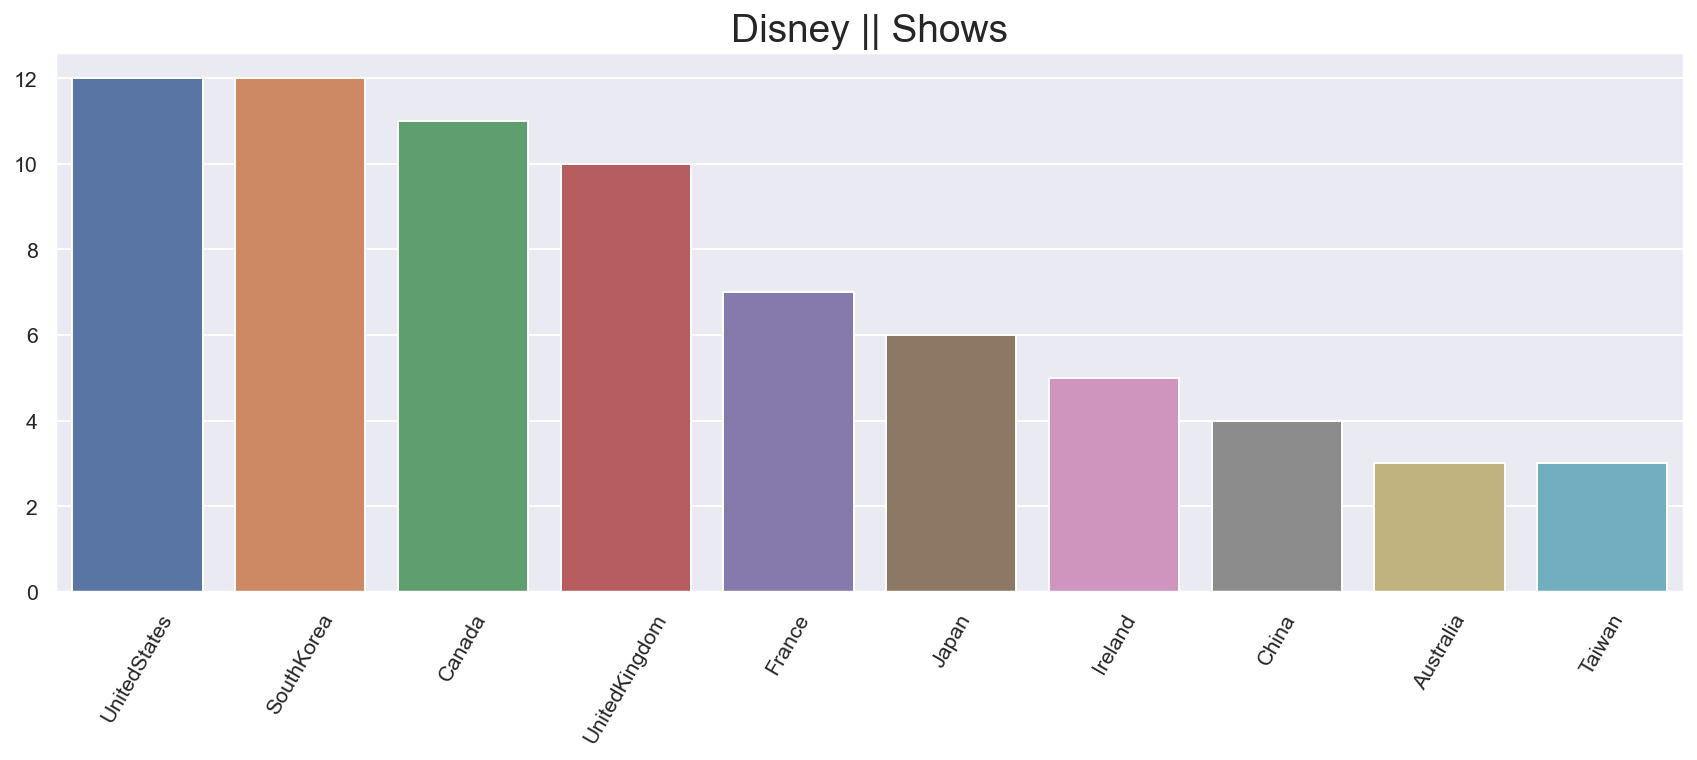

In [47]:
#Top 10 Content Creating Country's
#NETFLIX

countries={}
netflix_movies['country']=netflix_movies['country'].fillna('Unknown')
cou=list(netflix_movies['country'])
for i in cou:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries.keys()):
            countries[i]+=1
        else:
            countries[i[0]]=1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j]+=1
            else:
                countries[j]=1
countries_fin={}
for country,no in countries.items():
    country=country.replace(' ','')
    if country in list(countries_fin.keys()):
        countries_fin[country]+=no
    else:
        countries_fin[country]=no      
countries_fin={k: v for k, v in sorted(countries_fin.items(), key=lambda item: item[1], reverse= True)}

#Viz
plt.figure(figsize=(15,5))
sns.set(style="darkgrid")
plt.title('Netflix || Movies',size="20")
ax = sns.barplot(x=list(countries_fin.keys())[0:10],y=list(countries_fin.values())[0:10])
ax.set_xticklabels(list(countries_fin.keys())[0:10],rotation = 60)
plt.show()

countries={}
netflix_shows['country']=netflix_shows['country'].fillna('Unknown')
cou=list(netflix_shows['country'])
for i in cou:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries.keys()):
            countries[i]+=1
        else:
            countries[i[0]]=1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j]+=1
            else:
                countries[j]=1
countries_fin={}
for country,no in countries.items():
    country=country.replace(' ','')
    if country in list(countries_fin.keys()):
        countries_fin[country]+=no
    else:
        countries_fin[country]=no        
countries_fin={k: v for k, v in sorted(countries_fin.items(), key=lambda item: item[1], reverse= True)}

#Viz
plt.figure(figsize=(15,5))
sns.set(style="darkgrid")
plt.title('Netflix || Shows',size="20")
ax = sns.barplot(x=list(countries_fin.keys())[0:10],y=list(countries_fin.values())[0:10])
ax.set_xticklabels(list(countries_fin.keys())[0:10],rotation = 60)
plt.show()


#AMAZON
countries={}
amazon_movies['country']=amazon_movies['country'].fillna('Unknown')
cou=list(amazon_movies['country'])
for i in cou:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries.keys()):
            countries[i]+=1
        else:
            countries[i[0]]=1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j]+=1
            else:
                countries[j]=1
countries_fin={}
for country,no in countries.items():
    country=country.replace(' ','')
    if country in list(countries_fin.keys()):
        countries_fin[country]+=no
    else:
        countries_fin[country]=no      
countries_fin={k: v for k, v in sorted(countries_fin.items(), key=lambda item: item[1], reverse= True)}

#Viz
plt.figure(figsize=(15,5))
sns.set(style="darkgrid")
plt.title('Amazon || Movies',size="20")
ax = sns.barplot(x=list(countries_fin.keys())[0:10],y=list(countries_fin.values())[0:10])
ax.set_xticklabels(list(countries_fin.keys())[0:10],rotation = 60)
plt.show()

countries={}
amazon_shows['country']=amazon_shows['country'].fillna('Unknown')
cou=list(amazon_shows['country'])
for i in cou:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries.keys()):
            countries[i]+=1
        else:
            countries[i[0]]=1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j]+=1
            else:
                countries[j]=1
countries_fin={}
for country,no in countries.items():
    country=country.replace(' ','')
    if country in list(countries_fin.keys()):
        countries_fin[country]+=no
    else:
        countries_fin[country]=no        
countries_fin={k: v for k, v in sorted(countries_fin.items(), key=lambda item: item[1], reverse= True)}

#Viz
plt.figure(figsize=(15,5))
sns.set(style="darkgrid")
plt.title('Amazon || Shows',size="20")
ax = sns.barplot(x=list(countries_fin.keys())[0:10],y=list(countries_fin.values())[0:10])
ax.set_xticklabels(list(countries_fin.keys())[0:10],rotation = 60)
plt.show()

#DISNEY
countries={}
disney_movies['country']=disney_movies['country'].fillna('Unknown')
cou=list(disney_movies['country'])
for i in cou:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries.keys()):
            countries[i]+=1
        else:
            countries[i[0]]=1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j]+=1
            else:
                countries[j]=1
countries_fin={}
for country,no in countries.items():
    country=country.replace(' ','')
    if country in list(countries_fin.keys()):
        countries_fin[country]+=no
    else:
        countries_fin[country]=no      
countries_fin={k: v for k, v in sorted(countries_fin.items(), key=lambda item: item[1], reverse= True)}

#Viz
plt.figure(figsize=(15,5))
sns.set(style="darkgrid")
plt.title('Disney || Movies',size="20")
ax = sns.barplot(x=list(countries_fin.keys())[0:10],y=list(countries_fin.values())[0:10])
ax.set_xticklabels(list(countries_fin.keys())[0:10],rotation = 60)
plt.show()

countries={}
disney_shows['country']=disney_shows['country'].fillna('Unknown')
cou=list(disney_shows['country'])
for i in cou:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries.keys()):
            countries[i]+=1
        else:
            countries[i[0]]=1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j]+=1
            else:
                countries[j]=1
countries_fin={}
for country,no in countries.items():
    country=country.replace(' ','')
    if country in list(countries_fin.keys()):
        countries_fin[country]+=no
    else:
        countries_fin[country]=no        
countries_fin={k: v for k, v in sorted(countries_fin.items(), key=lambda item: item[1], reverse= True)}

#Viz
plt.figure(figsize=(15,5))
sns.set(style="darkgrid")
plt.title('Disney || Shows',size="20")
ax = sns.barplot(x=list(countries_fin.keys())[0:10],y=list(countries_fin.values())[0:10])
ax.set_xticklabels(list(countries_fin.keys())[0:10],rotation = 60)
plt.show()

## Content BY Target Ages

### Amazon

In [48]:
#Content BY Target Ages
ratings_ages = {
    '13+': 'Older Kids',
    '18+': 'Early Adulthood',
    '7+': 'Kids',
    '16+': 'Adults',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'TV-Y7': 'Older Kids',
    'NR': 'Adults',
    'TV-PG': 'Older Kids',
    'TV-14': 'Teens',
    'TV-G' : 'Kids',
    'PG-13' : 'Teens',
    'TV-MA' : 'Adults',
    'G' : 'Kids',
    'PG' : 'Older Kids',
    'NC-17' : 'Adults'}

# Feature Eng.
amazon['count'] = 1
amazon['first_country'] = amazon['country'].apply(lambda x: x.split(",")[0])
amazon['first_country'].head()
amazon['target_ages'] = amazon['rating'].replace(ratings_ages)
amazon['target_ages'].unique()

amazon['first_country'].head()

0            Canada
1             India
2     United States
3     United States
4    United Kingdom
Name: first_country, dtype: object

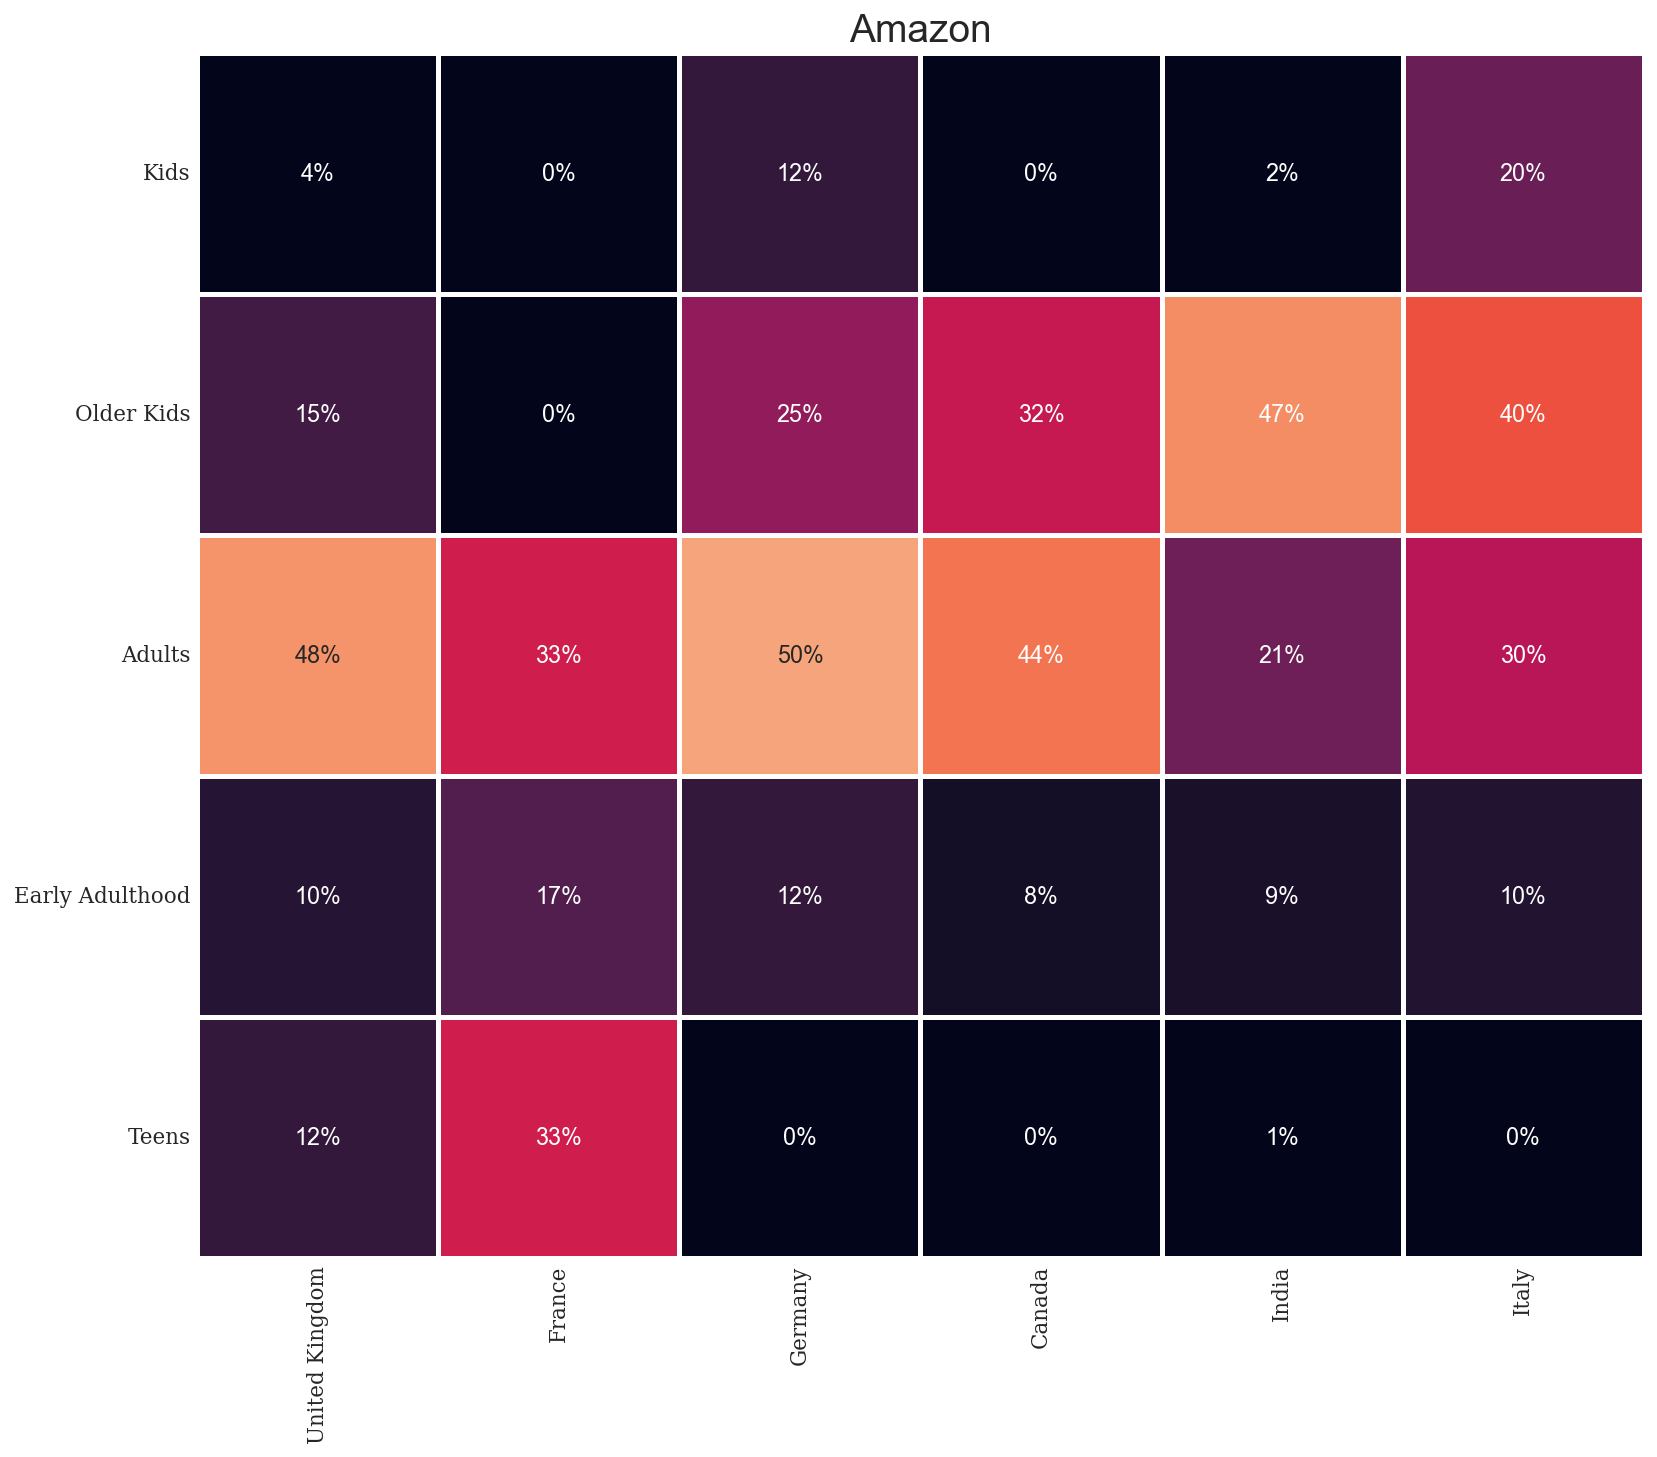

In [49]:
data = amazon.groupby('first_country')[['first_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['first_country']

amazon_heatmap = amazon.loc[amazon['first_country'].isin(data)]

#Viz
amazon_heatmap = pd.crosstab(amazon_heatmap['first_country'],amazon_heatmap['target_ages'],normalize = "index").T
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order = ['United Kingdom', 'France', 'Germany', 'Canada', 'India', 'Italy']

age_order = ['Kids','Older Kids','Adults','Early Adulthood','Teens']

sns.heatmap(amazon_heatmap.loc[age_order,country_order],square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
plt.title('Amazon',size="20")

ax.spines['top'].set_visible(True)


ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

ax.set_ylabel('')    
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()
plt.show()

### netflix

In [50]:
netflix_movies['rating'].unique().tolist()

country = {'United State',
          'France',
          'United Kingdom',
          'Germany',
          'Canada',
          'Belgium',
          'China',
          'Spain',
          'Japan',
          'India'}

ratings_ages = {'R': 'Adults',
    'TV-Y': 'Kids',
    'TV-Y7': 'Older Kids',
    'NR': 'Adults',
    'TV-PG': 'Older Kids',
    'TV-14': 'Teens',
    'TV-G' : 'Kids',
    'PG-13' : 'Teens',
    'TV-MA' : 'Adults',
    'G' : 'Kids',
    'PG' : 'Older Kids',
    'NC-17' : 'Adults',
    'TV-14' : 'Teens',
    'NR' : 'Adults'}

In [51]:
# Feature Eng.
netflix_movies['count'] = 1
netflix_movies['first_country'] = netflix_movies['country'].apply(lambda x: x.split(",")[0])
netflix_movies['first_country'].head()
netflix_movies['target_ages'] = netflix_movies['rating'].replace(ratings_ages)
netflix_movies['target_ages'].unique()

netflix_movies['first_country'].head()
netflix_movies['target_ages'].unique()

array(['Teens', 'Older Kids', 'Adults', 'Kids', '74 min', '84 min',
       '66 min', 'N/A', 'TV-Y7-FV', 'UR'], dtype=object)

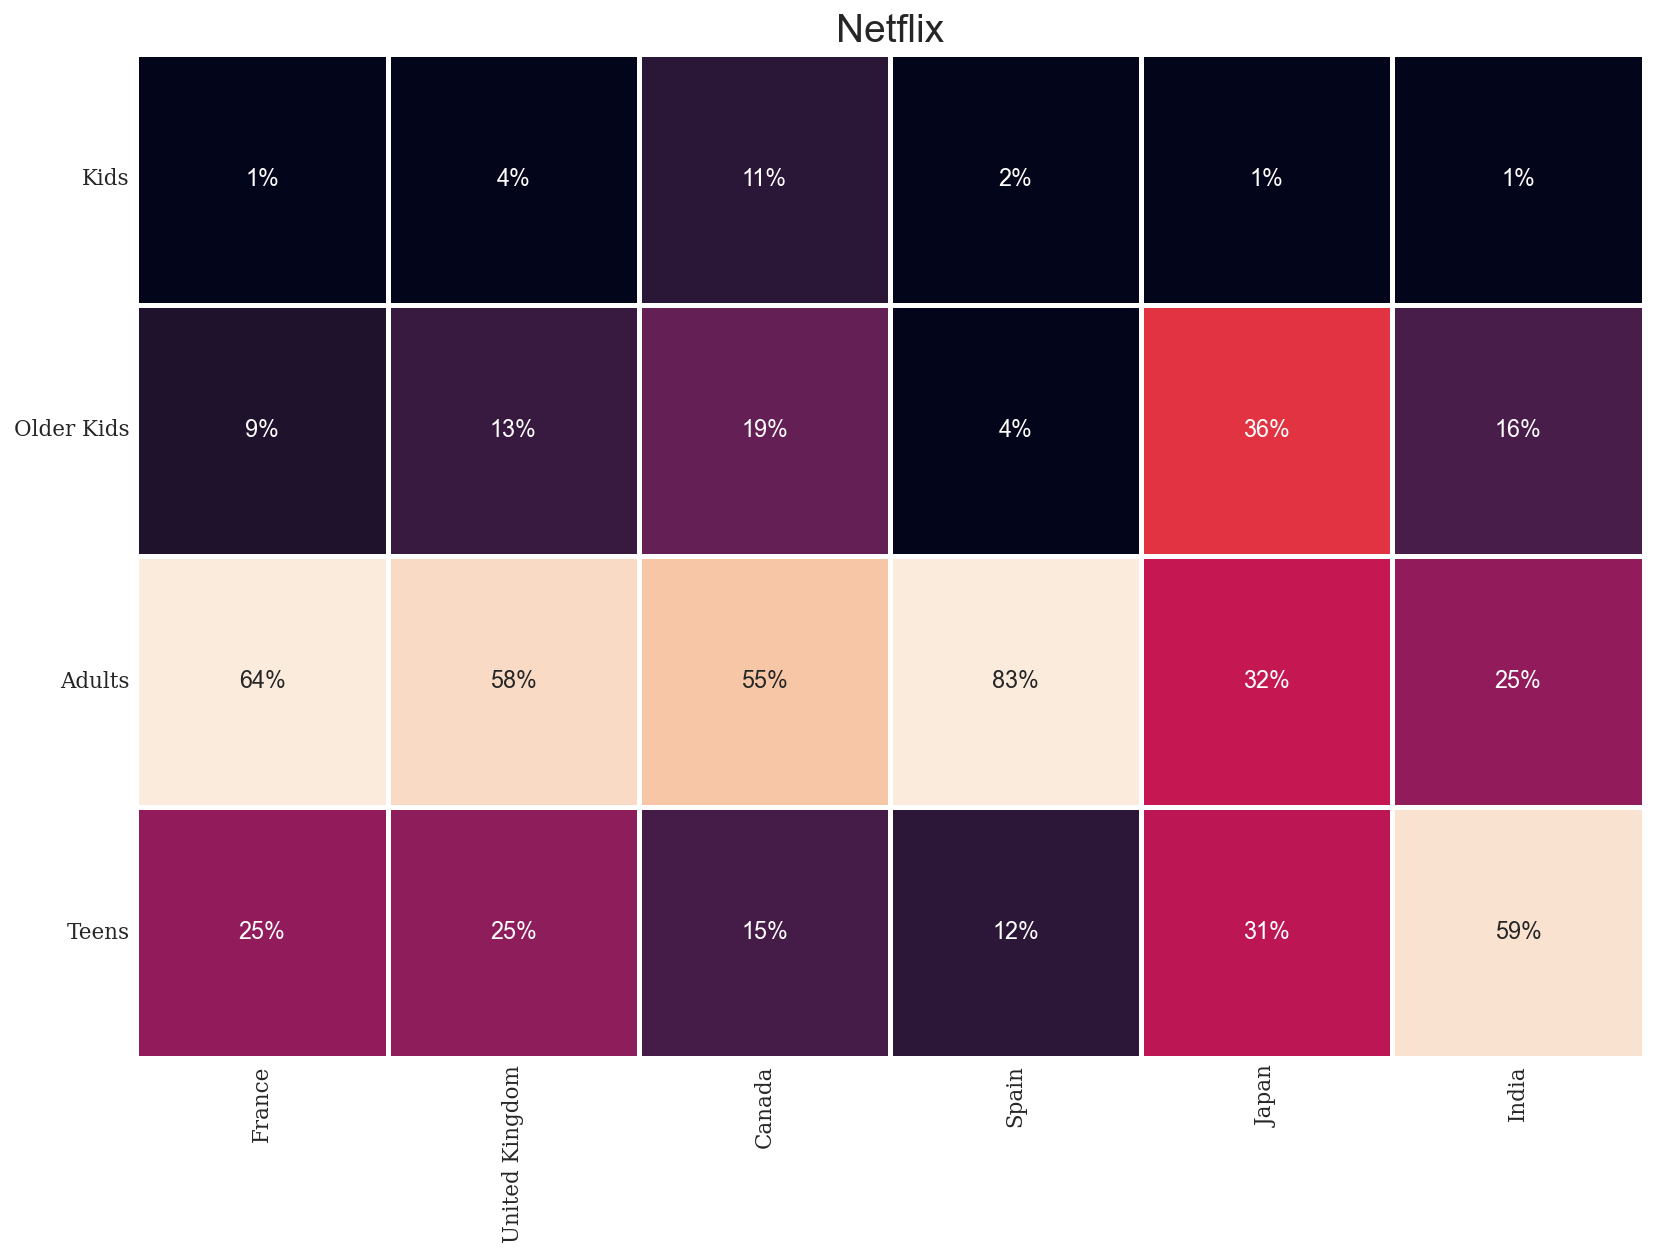

In [52]:
data = netflix_movies.groupby('first_country')[['first_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['first_country']

netflix_heatmap = netflix_movies.loc[netflix_movies['first_country'].isin(data)]

#Viz
netflix_heatmap = pd.crosstab(netflix_heatmap['first_country'],netflix_heatmap['target_ages'],normalize = "index").T
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order = ['France','United Kingdom','Canada','Spain','Japan','India']

age_order = ['Kids','Older Kids','Adults','Teens']

sns.heatmap(netflix_heatmap.loc[age_order,country_order],square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
plt.title('Netflix',size="20")

ax.spines['top'].set_visible(True)


ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

ax.set_ylabel('')    
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()
plt.show()

#### Disney

In [53]:
disney['rating'].unique().tolist()

country = {'United State',
          'France',
          'United Kingdom',
        'Canada',
           'Australia',
           'Japan',
           'China',
           'Ireland',
           'Germany'}

ratings_ages = {'R': 'Adults',
    'TV-Y': 'Kids',
    'TV-Y7': 'Older Kids',
    'NR': 'Adults',
    'TV-PG': 'Older Kids',
    'TV-14': 'Teens',
    'TV-G' : 'Kids',
    'PG-13' : 'Teens',
    'TV-MA' : 'Adults',
    'G' : 'Kids',
    'PG' : 'Older Kids',
    'NC-17' : 'Adults',
    'TV-14' : 'Teens',
    'NR' : 'Adults'}

# Feature Eng.
disney['count'] = 1
disney['first_country'] = disney['country'].apply(lambda x: x.split(",")[0])
disney['first_country'].head()
disney['target_ages'] = disney['rating'].replace(ratings_ages)
disney['target_ages'].unique()

disney['first_country'].head()
disney['target_ages'].unique()

array(['Kids', 'Older Kids', 'N/A', 'Teens', 'TV-Y7-FV'], dtype=object)

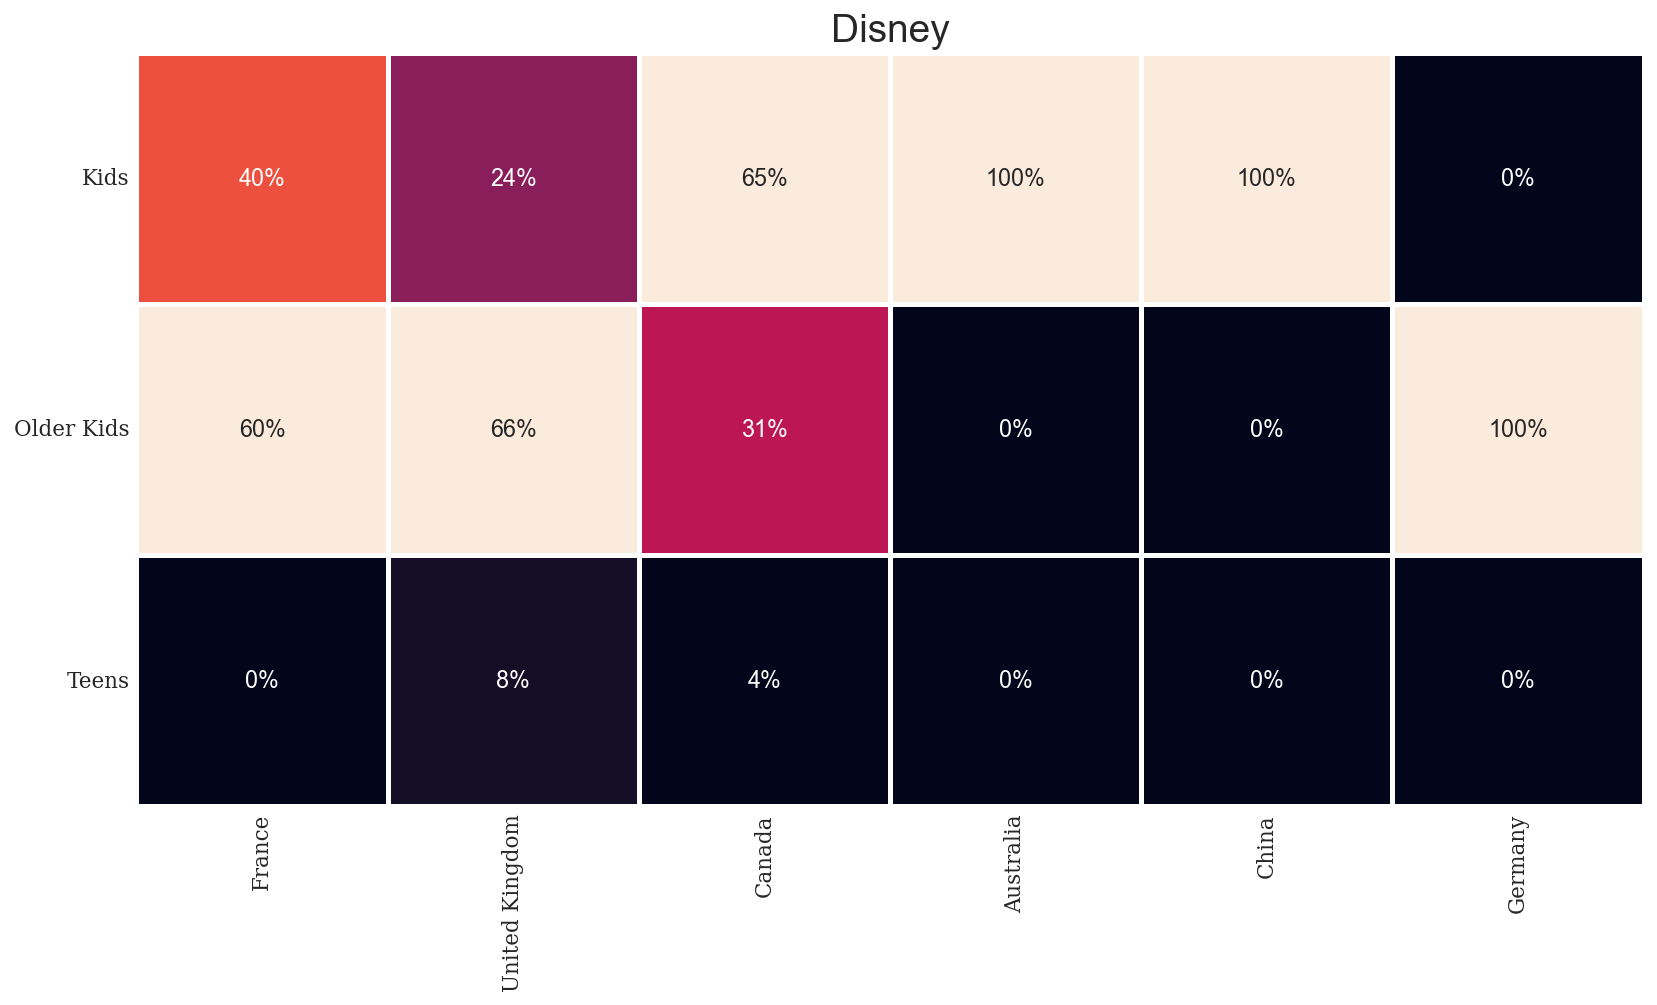

In [54]:
data = disney.groupby('first_country')[['first_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['first_country']

disney_heatmap = disney.loc[disney['first_country'].isin(data)]

#Viz
disney_heatmap = pd.crosstab(disney_heatmap['first_country'],disney_heatmap['target_ages'],normalize = "index").T
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order = ['France','United Kingdom','Canada','Australia','China','Germany']

age_order = ['Kids','Older Kids','Teens']

sns.heatmap(disney_heatmap.loc[age_order,country_order],square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
plt.title('Disney',size="20")

ax.spines['top'].set_visible(True)


ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

ax.set_ylabel('')    
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()
plt.show()